### Kickstarter Exploratory Data Analysis

In [1]:
import re
import pandas as pd
import numpy as np
from PIL import Image
import gensim
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arvindcheenu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def read_custom_csv(path,col_sep,row_sep):
    with open(path,'r') as custom_csv:
        lines = re.split(row_sep, custom_csv.read())
    h_text = lines[0].split()[0]
    header_list = h_text.split(col_sep)
    if row_sep == r"\|\|\|":
        lines[0] = lines[0][len(h_text):]
    else:
        lines[0] = lines[0][len(h_text) + len(row_sep) - 1:]
    headers={h.strip() : [] for h in header_list}
    for line in lines:
        cols = line[1:].split(col_sep)
        if len(cols) == len(header_list):
            for i in range(len(header_list)):
                headers[header_list[i]].append(cols[i])
        elif len(cols) == 1:
            continue
        else:
            print(path + ': invalid csv')
            break
    return pd.DataFrame(headers)

In [28]:
projects_1 = pd.read_csv('./output/Iteration_1/projects.csv')
rewards_1 = pd.read_csv('./output/Iteration_1/rewards.csv')
authors_1 = pd.read_csv('./output/Iteration_1/authors.csv')
updates_1 = pd.read_csv('./output/Iteration_1/updates.csv')
original = pd.read_csv('./output/Iteration_2/kicks_preprocessed.csv')
projects_2 = pd.read_csv('./output/Iteration_2/projects.csv')
rewards_2 = pd.read_csv('./output/Iteration_2/rewards.csv')
authors_2 = pd.read_csv('./output/Iteration_2/authors.csv')
updates_2 = pd.read_csv('./output/Iteration_2/updates.csv')
projects_text = read_custom_csv('./output/Iteration_2/projects_text.txt',":::",r"\n(?=.\d{5,})")
authors_text = read_custom_csv('./output/Iteration_2/authors_text.txt',":::",r"\n(?=.\d{5,})")
rewards_text = read_custom_csv('./output/Iteration_2/rewards_text.txt',":::",r"\n(?=.\d{5,})")
projects_text2 = read_custom_csv('./output/Iteration_3/projects_text.txt',":::",r"\|\|\|")
authors_text2 = read_custom_csv('./output/Iteration_3/authors_text.txt',":::",r"\n(?=.\d{5,})")
rewards_text2 = read_custom_csv('./output/Iteration_3/rewards_text.txt',":::",r"\n(?=.\d{5,})")
updates_text2 = read_custom_csv('./output/Iteration_3/updates_text.txt',":::",r"\n(?=.\d{5,})")
projects_text3 = read_custom_csv('./output/Iteration_4/projects_text.txt',":::",r"\|\|\|")
authors_text3 = read_custom_csv('./output/Iteration_4/authors_text.txt',":::",r"\n(?=.\d{5,})")
rewards_text3 = read_custom_csv('./output/Iteration_4/rewards_text.txt',":::",r"\n(?=.\d{5,})")
updates_text3 = read_custom_csv('./output/Iteration_4/updates_text.txt',":::",r"\n(?=.\d{5,})")

./output/Iteration_4/updates_text.txt: invalid csv


In [6]:
projects_text2['project_id'] = projects_text2['project_id'].apply(lambda x: int(x.strip()[1:]))
projects_text3['project_id'] = projects_text3['project_id'].apply(lambda x: int(x.strip()[1:]))

In [29]:
rewards_text2['reward_id'] = rewards_text2['reward_id'].apply(lambda x: int(x))
rewards_text2['project_id'] = rewards_text2['project_id'].apply(lambda x: int(x))
rewards_text2['tier_weighted_total'] = rewards_text2['tier_weighted_total'].apply(lambda x: float(x.split('|||')[0]))
rewards_text3['reward_id'] = rewards_text3['reward_id'].apply(lambda x: int(x))
rewards_text3['project_id'] = rewards_text3['project_id'].apply(lambda x: int(x))
rewards_text3['tier_weighted_total'] = rewards_text3['tier_weighted_total'].apply(lambda x: float(x.split('|||')[0]))

In [30]:
print(rewards_text3.columns.all() == rewards_text2.columns.all())

True


In [31]:
rewards = pd.concat([rewards_1, rewards_2])

In [32]:
rewards_text['reward_id'] = rewards_text['reward_id'].apply(lambda x: int(x))
rewards_text['project_id'] = rewards_text['project_id'].apply(lambda x: int(x))
rewards_text = rewards_text.copy().drop(['project_id'],axis=1)

In [33]:
all_reward_info = pd.merge(rewards, rewards_text, on="reward_id")
#all_reward_info = pd.get_dummies(all_reward_info, drop_first=True, columns=["reward_shipping"])
all_reward_info = all_reward_info[['reward_id', 'project_id', 'reward_title', 'reward_desc',
       'reward_title_length', 'reward_title_words', 'reward_desc_length',
       'reward_desc_words', 'reward_desc_polarity', 'reward_desc_subjectivity',
       'reward_minimum', 'reward_limit', 'estimated_delivery',
       'reward_shipping', 'reward_backers', 'tier_total', 'tier_contribution',
       'tier_weighted_total']]

In [34]:
rewards_df = pd.concat([all_reward_info, rewards_text2, rewards_text3])
rewards_df

,reward_id,project_id,reward_title,reward_desc,reward_title_length,reward_title_words,reward_desc_length,reward_desc_words,reward_desc_polarity,reward_desc_subjectivity,reward_minimum,reward_limit,estimated_delivery,reward_shipping,reward_backers,tier_total,tier_contribution,tier_weighted_total
0,7309884,682031137,BADGIRL Digital starter kit,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -PDF \n2....,27,4,210,36,-0.0404762,0.291071,10,0,2019-09-01,no_shipping,17,170,0.00436872,0.742682
1,7310306,682031137,Physical copy Soft cover +PDF-Kick,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -Kickstar...,34,5,423,71,0.010119,0.189435,15,20,2019-09-01,anywhere,17,255,0.00655308,1.671035
2,7310311,682031137,BADGIRL COLOR PIN UP SPECIAL -All 3 ed.,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,40,8,549,93,0.0625541,0.250541,35,15,2019-09-01,anywhere,11,385,0.0152905,5.886850
3,7310982,682031137,VIP BAD GIRL-Art collector-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,39,5,643,103,0.0521329,0.281746,75,7,2019-09-01,anywhere,6,450,0.0327654,14.744430
4,7310991,682031137,Sketch card BAD GIRL-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,33,5,706,113,0.0817766,0.327381,125,5,2019-09-01,anywhere,1,125,0.054609,6.826125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46854,7108001,163659301,"FLUXBAG PRO """"Balloons United Edition""""",FLUXBAG PRO (140L) with extension + five-piece...,37,5,120,16,0.0,0.0,28.0,0,2019-05-01,anywhere,71,1988.0,0.0021972847838028723,4.368202
46855,16777,163659301,Triple Pack FLUXBAG FUN,3x FLUXBAG FUN multipack. Extension trunks inc...,23,4,52,7,0.15,0.1,45.0,0,2019-05-01,anywhere,9,405.0,0.0035313505453974732,1.430197
46856,16778,163659301,Triple Pack FLUXBAG PRO,3x FLUXBAG PRO multipack. Extension trunks inc...,23,4,52,7,0.0,0.0,56.0,0,2019-05-01,anywhere,17,952.0,0.004394569567605745,4.183630
46857,7008023,163659301,Early Bird: FLUXBAG FUN + Additional Kit,FLUXBAG FUN (100L) with extension trunk plus a...,40,6,160,28,0.2458333333333333,0.35416666666666663,17.0,100,2019-05-01,anywhere,100,1700.0,0.001334065761594601,2.267912


In [35]:
rewards_df.columns

Index(['reward_id', 'project_id', 'reward_title', 'reward_desc',
       'reward_title_length', 'reward_title_words', 'reward_desc_length',
       'reward_desc_words', 'reward_desc_polarity', 'reward_desc_subjectivity',
       'reward_minimum', 'reward_limit', 'estimated_delivery',
       'reward_shipping', 'reward_backers', 'tier_total', 'tier_contribution',
       'tier_weighted_total'],
      dtype='object')

In [40]:
rewards_df['reward_title_length'] = rewards_df['reward_title_length'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]).astype(int)
rewards_df['reward_title_words'] = rewards_df['reward_title_words'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]).astype(int)
rewards_df['reward_desc_length'] = rewards_df['reward_desc_length'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]).astype(int)
rewards_df['reward_desc_words'] = rewards_df['reward_desc_words'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]).astype(int)
rewards_df['reward_limit'] = rewards_df['reward_limit'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]).astype(int)
rewards_df['reward_backers'] = rewards_df['reward_backers'].apply(lambda x: re.findall(r"[-+]?\d*\.\d+|\d+", str(x))[0]).astype(int)
rewards_df.dtypes

reward_id                     int64
project_id                    int64
reward_title                 object
reward_desc                  object
reward_title_length           int64
reward_title_words            int64
reward_desc_length            int64
reward_desc_words             int64
reward_desc_polarity         object
reward_desc_subjectivity     object
reward_minimum               object
reward_limit                  int64
estimated_delivery           object
reward_shipping              object
reward_backers                int64
tier_total                   object
tier_contribution            object
tier_weighted_total         float64
dtype: object

In [49]:
rewards_df['reward_desc_polarity'] = rewards_df['reward_desc_polarity'].apply(lambda x: ''.join(re.findall(r"[-+]?\d*\.\d+|\d+", str(x))))
rewards_df['reward_desc_subjectivity'] = rewards_df['reward_desc_subjectivity'].apply(lambda x: ''.join(re.findall(r"[-+]?\d*\.\d+|\d+", str(x))))
rewards_df['reward_minimum'] = rewards_df['reward_minimum'].apply(lambda x: ''.join(re.findall(r"[-+]?\d*\.\d+|\d+", str(x))))
rewards_df['tier_total'] = rewards_df['tier_total'].apply(lambda x: ''.join(re.findall(r"[-+]?\d*\.\d+|\d+", str(x))))
rewards_df['tier_contribution'] = rewards_df['tier_contribution'].apply(lambda x: ''.join(re.findall(r"[-+]?\d*\.\d+|\d+", str(x))))
rewards_df['tier_weighted_total'] = rewards_df['tier_weighted_total'].apply(lambda x: ''.join(re.findall(r"[-+]?\d*\.\d+|\d+", str(x))))

In [50]:
rewards_df['reward_desc_polarity'] = rewards_df['reward_desc_polarity'].apply(lambda x: 0.0 if not x else float(x))
rewards_df['reward_desc_subjectivity'] = rewards_df['reward_desc_subjectivity'].apply(lambda x: 0.0 if not x else float(x))
rewards_df['reward_minimum'] = rewards_df['reward_minimum'].apply(lambda x: 0.0 if not x else float(x))
rewards_df['tier_total'] = rewards_df['tier_total'].apply(lambda x: 0.0 if not x else float(x))
rewards_df['tier_contribution'] = rewards_df['tier_contribution'].apply(lambda x: 0.0 if not x else float(x))
rewards_df['tier_weighted_total'] = rewards_df['tier_weighted_total'].apply(lambda x: 0.0 if not x else float(x))

In [59]:
new_subtopic = original[['project_id','state']]
new_subtopic['state'] = new_subtopic['state'].apply(lambda x: 1 if x=='successful' else 0)
new_subtopic

,project_id,state
0,682031137,1
1,24098319,0
2,980834458,1
3,908929425,0
4,1211032216,1
...,...,...
172220,1910352473,1
172221,2089078683,1
172222,727286,1
172223,139963887,1


In [134]:
out = pd.merge(rewards_df,new_subtopic,on='project_id' )
out

,reward_id,project_id,reward_title,reward_desc,reward_title_length,reward_title_words,reward_desc_length,reward_desc_words,reward_desc_polarity,reward_desc_subjectivity,reward_minimum,reward_limit,estimated_delivery,reward_shipping,reward_backers,tier_total,tier_contribution,tier_weighted_total,state
0,7309884,682031137,BADGIRL Digital starter kit,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -PDF \n2....,27,4,210,36,-0.040476,0.291071,10.0,0,2019-09-01,no_shipping,17,170.0,0.004369,0.742682,1
1,7310306,682031137,Physical copy Soft cover +PDF-Kick,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -Kickstar...,34,5,423,71,0.010119,0.189435,15.0,20,2019-09-01,anywhere,17,255.0,0.006553,1.671035,1
2,7310311,682031137,BADGIRL COLOR PIN UP SPECIAL -All 3 ed.,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,40,8,549,93,0.062554,0.250541,35.0,15,2019-09-01,anywhere,11,385.0,0.015291,5.886850,1
3,7310982,682031137,VIP BAD GIRL-Art collector-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,39,5,643,103,0.052133,0.281746,75.0,7,2019-09-01,anywhere,6,450.0,0.032765,14.744430,1
4,7310991,682031137,Sketch card BAD GIRL-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,33,5,706,113,0.081777,0.327381,125.0,5,2019-09-01,anywhere,1,125.0,0.054609,6.826125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119052,7108001,163659301,"FLUXBAG PRO """"Balloons United Edition""""",FLUXBAG PRO (140L) with extension + five-piece...,37,5,120,16,0.000000,0.000000,28.0,0,2019-05-01,anywhere,71,1988.0,0.002197,4.368202,1
119053,16777,163659301,Triple Pack FLUXBAG FUN,3x FLUXBAG FUN multipack. Extension trunks inc...,23,4,52,7,0.150000,0.100000,45.0,0,2019-05-01,anywhere,9,405.0,0.003531,1.430197,1
119054,16778,163659301,Triple Pack FLUXBAG PRO,3x FLUXBAG PRO multipack. Extension trunks inc...,23,4,52,7,0.000000,0.000000,56.0,0,2019-05-01,anywhere,17,952.0,0.004395,4.183630,1
119055,7008023,163659301,Early Bird: FLUXBAG FUN + Additional Kit,FLUXBAG FUN (100L) with extension trunk plus a...,40,6,160,28,0.245833,0.354167,17.0,100,2019-05-01,anywhere,100,1700.0,0.001334,2.267912,1


In [135]:
out = pd.get_dummies(out, columns=['reward_shipping'])


In [138]:
out = out.groupby('project_id').sum()

In [139]:
out.columns

Index(['reward_id', 'reward_title_length', 'reward_title_words',
       'reward_desc_length', 'reward_desc_words', 'reward_desc_polarity',
       'reward_desc_subjectivity', 'reward_minimum', 'reward_limit',
       'reward_backers', 'tier_total', 'tier_contribution',
       'tier_weighted_total', 'state', 'reward_shipping_anywhere',
       'reward_shipping_multiple_locations', 'reward_shipping_no_shipping',
       'reward_shipping_single_location'],
      dtype='object')

In [140]:
out = out[['reward_minimum', 'reward_limit',
       'reward_backers', 'tier_total', 'tier_contribution',
       'tier_weighted_total', 'reward_shipping_anywhere',
       'reward_shipping_multiple_locations', 'reward_shipping_no_shipping',
       'reward_shipping_single_location','state']]

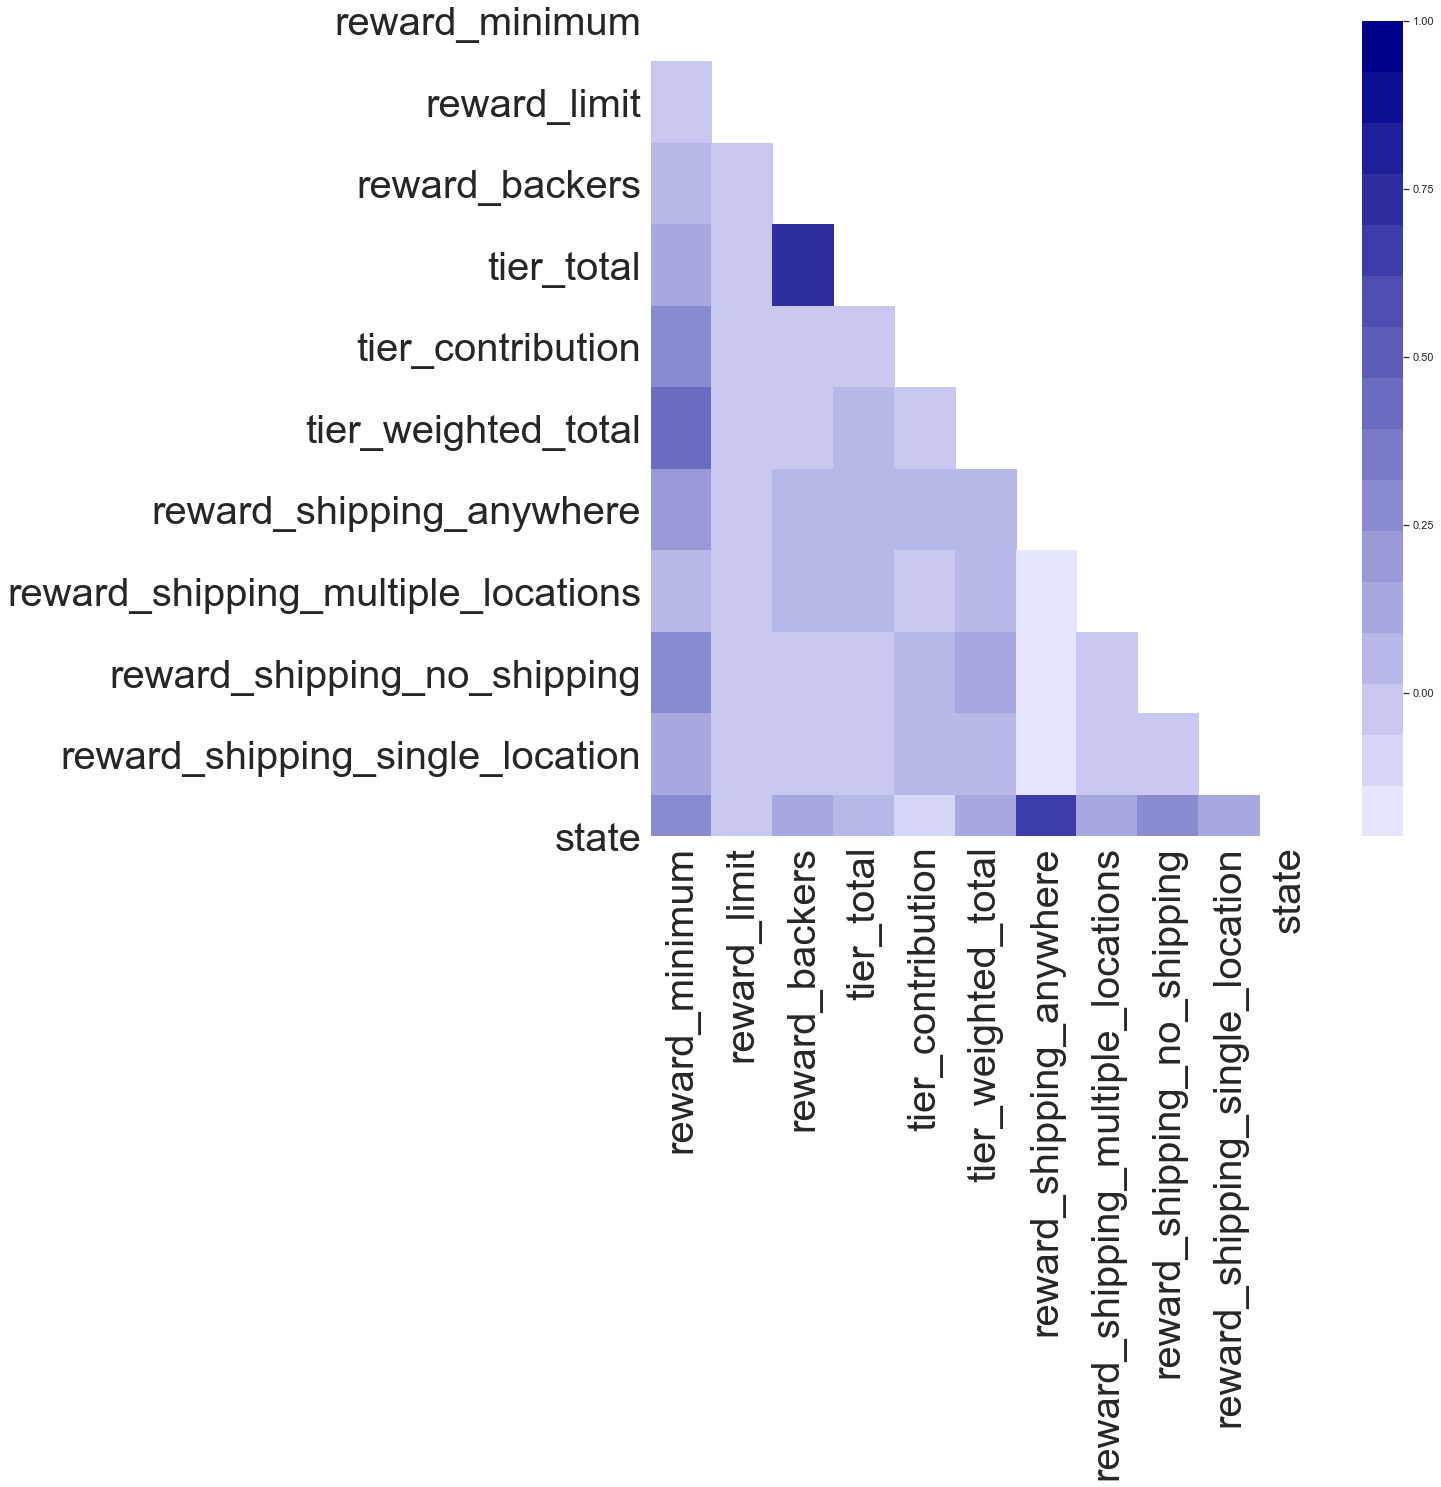

In [145]:
corr = out.corr()
plt.figure(figsize=(15,15))
sns.set()
sns.set_style("white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,cmap=sns.light_palette("darkblue",16),annot=False,mask=mask)
ax.tick_params(labelsize=40)

In [465]:
rewards.shape

(21557, 16)

In [466]:
rewards.dtypes

reward_id                     int64
project_id                    int64
reward_title_length           int64
reward_title_words            int64
reward_desc_length            int64
reward_desc_words             int64
reward_desc_polarity        float64
reward_desc_subjectivity    float64
reward_minimum              float64
reward_limit                  int64
estimated_delivery           object
reward_shipping              object
reward_backers                int64
tier_total                  float64
tier_contribution           float64
tier_weighted_total         float64
dtype: object

In [469]:
authors_1.shape

(516, 10)

In [472]:
authors_text3.dtypes

author_id           object
project_id          object
author_name         object
author_bio          object
bio_length          object
bio_words           object
bio_polarity        object
bio_subjectivity    object
author_created      object
author_backed       object
author_join_year    object
dtype: object

In [446]:
original.shape

(172225, 27)

In [460]:
original.dtypes

id                    int64
name_length           int64
name                 object
blurb_length          int64
blurb                object
backers_count         int64
main_category        object
sub_category         object
locale_name          object
locale_state         object
locale_country       object
locale_type          object
funding_duration      int64
launched_month        int64
end_month             int64
launched_quarter     object
end_quarter          object
created_at           object
launched_at          object
deadline             object
spotlight              bool
staff_pick             bool
goal                float64
usd_pledged         float64
state                object
creator              object
urls                 object
dtype: object

In [458]:
round(original[original.state == 'successful'].main_category.value_counts()* 100/original.main_category.value_counts()).astype(int).astype(str) + '\%'

art             58\%
comics          80\%
crafts          42\%
dance           79\%
design          62\%
fashion         61\%
film & video    59\%
food            30\%
games           63\%
journalism      32\%
music           68\%
photography     41\%
publishing      70\%
technology      37\%
theater         65\%
Name: main_category, dtype: object

In [485]:
print(*all_info.columns,sep='\n')

main_category_comics
main_category_crafts
main_category_dance
main_category_design
main_category_fashion
main_category_film & video
main_category_food
main_category_games
main_category_journalism
main_category_music
main_category_photography
main_category_publishing
main_category_technology
main_category_theater
sub_category_academic
sub_category_accessories
sub_category_action
sub_category_animals
sub_category_animation
sub_category_anthologies
sub_category_apparel
sub_category_apps
sub_category_architecture
sub_category_art books
sub_category_audio
sub_category_bacon
sub_category_blues
sub_category_calendars
sub_category_camera equipment
sub_category_candles
sub_category_ceramics
sub_category_children's books
sub_category_childrenswear
sub_category_chiptune
sub_category_civic design
sub_category_classical music
sub_category_comedy
sub_category_comic books
sub_category_community gardens
sub_category_conceptual art
sub_category_cookbooks
sub_category_country & folk
sub_category_couture

In [376]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(False, 'minor')

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('white')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[10]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
        sns.despine(left=True, bottom=True)


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(37, 150, l=60, n=20),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

In [373]:
rewards_df['reward_title_length'] = rewards_df['reward_title_length'].apply(lambda x: int(''.join(str(x).split(':'))))
rewards_df['reward_title_words'] = rewards_df['reward_title_words'].apply(lambda x: int(''.join(str(x).split(':'))))
rewards_df['reward_desc_length'] = rewards_df['reward_desc_length'].apply(lambda x: int(''.join(str(x).split(':'))))
rewards_df['reward_desc_words'] = rewards_df['reward_desc_words'].apply(lambda x: int(''.join(str(x).split(':'))))
rewards_df['reward_desc_polarity'] = rewards_df['reward_desc_polarity'].apply(lambda x: float(''.join(str(x).split(':'))))
rewards_df['reward_desc_subjectivity'] = rewards_df['reward_desc_subjectivity'].apply(lambda x: float(''.join(str(x).split(':'))))
rewards_df['reward_minimum'] = rewards_df['reward_minimum'].apply(lambda x: float(''.join(str(x).split(':'))))
rewards_df['reward_limit'] = rewards_df['reward_limit'].apply(lambda x: int(''.join(str(x).split(':'))))
rewards_df['reward_backers'] = rewards_df['reward_backers'].apply(lambda x: int(''.join(str(x).split(':'))))
rewards_df['tier_total'] = rewards_df['tier_total'].apply(lambda x: float(''.join(str(x).split(':'))))
rewards_df['tier_contribution'] = rewards_df['tier_contribution'].apply(lambda x: float(''.join(str(x).split(':'))))
rewards_df

,reward_id,project_id,reward_title,reward_desc,reward_title_length,reward_title_words,reward_desc_length,reward_desc_words,reward_desc_polarity,reward_desc_subjectivity,reward_minimum,reward_limit,estimated_delivery,reward_shipping,reward_backers,tier_total,tier_contribution,tier_weighted_total
0,7309884,682031137,BADGIRL Digital starter kit,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -PDF \n2....,27,4,210,36,-0.040476,0.291071,10.0,0,2019-09-01,no_shipping,17,170.0,0.004369,0.742682
1,7310306,682031137,Physical copy Soft cover +PDF-Kick,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -Kickstar...,34,5,423,71,0.010119,0.189435,15.0,20,2019-09-01,anywhere,17,255.0,0.006553,1.671035
2,7310311,682031137,BADGIRL COLOR PIN UP SPECIAL -All 3 ed.,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,40,8,549,93,0.062554,0.250541,35.0,15,2019-09-01,anywhere,11,385.0,0.015291,5.886850
3,7310982,682031137,VIP BAD GIRL-Art collector-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,39,5,643,103,0.052133,0.281746,75.0,7,2019-09-01,anywhere,6,450.0,0.032765,14.744430
4,7310991,682031137,Sketch card BAD GIRL-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...,33,5,706,113,0.081777,0.327381,125.0,5,2019-09-01,anywhere,1,125.0,0.054609,6.826125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46854,7108001,163659301,"FLUXBAG PRO """"Balloons United Edition""""",FLUXBAG PRO (140L) with extension + five-piece...,37,5,120,16,0.000000,0.000000,28.0,0,2019-05-01,anywhere,71,1988.0,0.002197,4.368202
46855,16777,163659301,Triple Pack FLUXBAG FUN,3x FLUXBAG FUN multipack. Extension trunks inc...,23,4,52,7,0.150000,0.100000,45.0,0,2019-05-01,anywhere,9,405.0,0.003531,1.430197
46856,16778,163659301,Triple Pack FLUXBAG PRO,3x FLUXBAG PRO multipack. Extension trunks inc...,23,4,52,7,0.000000,0.000000,56.0,0,2019-05-01,anywhere,17,952.0,0.004395,4.183630
46857,7008023,163659301,Early Bird: FLUXBAG FUN + Additional Kit,FLUXBAG FUN (100L) with extension trunk plus a...,40,6,160,28,0.245833,0.354167,17.0,100,2019-05-01,anywhere,100,1700.0,0.001334,2.267912


In [374]:
rewards_df.dtypes

reward_id                     int64
project_id                    int64
reward_title                 object
reward_desc                  object
reward_title_length           int64
reward_title_words            int64
reward_desc_length            int64
reward_desc_words             int64
reward_desc_polarity        float64
reward_desc_subjectivity    float64
reward_minimum              float64
reward_limit                  int64
estimated_delivery           object
reward_shipping              object
reward_backers                int64
tier_total                  float64
tier_contribution           float64
tier_weighted_total         float64
dtype: object

In [69]:
projects = pd.concat([projects_1, projects_2])
projects = projects.drop(['has_main_video'],axis=1)
projects

,project_id,pledge_per_backer,content_images,content_videos,content_words,content_length,content_polarity,content_subjectivity,risk_words,risk_length,risk_polarity,risk_subjectivity,comments_count,updates_count,rewards_count,total_min_reward,min_reward_wt_avg,backer_belief
0,682031137,40.875000,12,0,247,1524,0.075568,0.487197,13,81,0.000000,0.000000,1,7,9,1902.0,162.436475,0.017857
1,24098319,0.000000,0,0,122,644,0.028241,0.367593,72,355,0.125765,0.234694,0,0,9,0.0,0.000000,0.000000
2,980834458,30.154472,6,1,620,3502,0.080712,0.286756,97,571,0.078125,0.690625,14,2,7,3265.0,397.335165,0.040650
3,908929425,16.071429,5,0,746,4685,0.013608,0.258386,145,811,0.081667,0.611667,4,9,17,1962.0,54.983607,0.029762
4,1211032216,13.466667,1,1,146,989,0.098958,0.269097,31,179,0.000000,0.785714,0,5,3,132.0,48.486486,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2095196620,53.388889,29,0,550,3085,0.169105,0.400030,81,414,0.400000,0.495833,3,12,16,528.0,31.649194,0.166667
2200,1002385458,30.272727,0,0,236,1439,0.017083,0.202083,29,176,-0.035714,0.071429,0,2,2,495.0,275.769231,0.136364
2201,331021887,33.980392,24,0,157,837,0.213591,0.406441,114,702,0.052381,0.514881,8,21,27,2906.0,72.991192,0.009804
2202,886800902,41.259259,15,0,859,4995,0.156269,0.335661,417,2589,0.081816,0.372033,0,11,10,9630.0,1482.916188,0.170370


In [70]:
projects

,project_id,pledge_per_backer,content_images,content_videos,content_words,content_length,content_polarity,content_subjectivity,risk_words,risk_length,risk_polarity,risk_subjectivity,comments_count,updates_count,rewards_count,total_min_reward,min_reward_wt_avg,backer_belief
0,682031137,40.875000,12,0,247,1524,0.075568,0.487197,13,81,0.000000,0.000000,1,7,9,1902.0,162.436475,0.017857
1,24098319,0.000000,0,0,122,644,0.028241,0.367593,72,355,0.125765,0.234694,0,0,9,0.0,0.000000,0.000000
2,980834458,30.154472,6,1,620,3502,0.080712,0.286756,97,571,0.078125,0.690625,14,2,7,3265.0,397.335165,0.040650
3,908929425,16.071429,5,0,746,4685,0.013608,0.258386,145,811,0.081667,0.611667,4,9,17,1962.0,54.983607,0.029762
4,1211032216,13.466667,1,1,146,989,0.098958,0.269097,31,179,0.000000,0.785714,0,5,3,132.0,48.486486,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,2095196620,53.388889,29,0,550,3085,0.169105,0.400030,81,414,0.400000,0.495833,3,12,16,528.0,31.649194,0.166667
2200,1002385458,30.272727,0,0,236,1439,0.017083,0.202083,29,176,-0.035714,0.071429,0,2,2,495.0,275.769231,0.136364
2201,331021887,33.980392,24,0,157,837,0.213591,0.406441,114,702,0.052381,0.514881,8,21,27,2906.0,72.991192,0.009804
2202,886800902,41.259259,15,0,859,4995,0.156269,0.335661,417,2589,0.081816,0.372033,0,11,10,9630.0,1482.916188,0.170370


In [56]:
projects_3 = projects_text2.copy()
projects_3['backer_belief'] = projects_3['backer_belief'].apply(lambda x: 1.0 - float(x))
projects_4 = projects_text3.copy()
projects_4['backer_belief'] = projects_4['backer_belief'].apply(lambda x: 1.0 - float(x))
print(projects_3.columns.all() == projects_4.columns.all())

True


In [57]:
original.rename(columns={'id':'project_id'}, inplace=True)

In [508]:
projects_text['project_id'] = projects_text['project_id'].apply(lambda x: int(x))

In [509]:
print(projects[projects.duplicated()].empty)

True


In [512]:
all_proj_info = pd.merge(projects, projects_text, on="project_id")
all_proj_info = all_proj_info[['project_id', 'content_text', 'risk_text', 'pledge_per_backer',
       'content_images', 'content_videos', 'content_words', 'content_length',
       'content_polarity', 'content_subjectivity', 'risk_words', 'risk_length',
       'risk_polarity', 'risk_subjectivity', 'comments_count', 'updates_count',
       'rewards_count', 'total_min_reward', 'min_reward_wt_avg',
       'backer_belief']]

In [513]:
from gensim.utils import simple_preprocess

In [514]:
all_proj_info = pd.concat([all_proj_info,projects_3,projects_4],ignore_index=True)
all_proj_info['content_text'] = all_proj_info['content_text'].apply(lambda x: ' '.join(simple_preprocess(x.lower())))
all_proj_info['risk_text'] = all_proj_info['risk_text'].apply(lambda x: ' '.join(simple_preprocess(x.lower())))
all_proj_info['pledge_per_backer'] = all_proj_info['pledge_per_backer'].apply(lambda x: float(''.join(str(x).split(':'))))
all_proj_info['content_images'] = all_proj_info['content_images'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['content_videos'] = all_proj_info['content_videos'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['content_words'] = all_proj_info['content_words'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['content_length'] = all_proj_info['content_length'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['content_polarity']=all_proj_info['content_text'].apply(lambda x: TextBlob(x).sentences[0].sentiment.polarity if x else np.nan)
all_proj_info['content_subjectivity']=all_proj_info['content_text'].apply(lambda x: TextBlob(x).sentences[0].sentiment.subjectivity if x else np.nan)
all_proj_info['risk_words'] = all_proj_info['risk_words'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['risk_length'] = all_proj_info['risk_length'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['risk_polarity']=all_proj_info['risk_text'].apply(lambda x: TextBlob(x).sentences[0].sentiment.polarity if x else np.nan)
all_proj_info['risk_subjectivity']=all_proj_info['risk_text'].apply(lambda x: TextBlob(x).sentences[0].sentiment.subjectivity if x else np.nan)
all_proj_info['comments_count'] = all_proj_info['comments_count'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['updates_count'] = all_proj_info['updates_count'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['rewards_count'] = all_proj_info['rewards_count'].apply(lambda x: int(''.join(str(x).split(':'))))
all_proj_info['total_min_reward'] = all_proj_info['total_min_reward'].apply(lambda x: float(''.join(str(x).split(':'))))
all_proj_info['min_reward_wt_avg'] = all_proj_info['min_reward_wt_avg'].apply(lambda x: float(''.join(str(x).split(':'))))

In [515]:
all_info = pd.merge(all_proj_info, original, on="project_id")
all_info = all_info.drop(['creator','urls'], axis=1)
all_info['name'] = all_info['name'].apply(lambda x: ' '.join(simple_preprocess(x.lower())))
all_info['blurb'] = all_info['blurb'].apply(lambda x: ' '.join(simple_preprocess(x.lower())))
all_info['content_text'] = all_info['content_text'].apply(lambda x: ' '.join(simple_preprocess(x)))
all_info['risk_text'] = all_info['risk_text'].apply(lambda x: ' '.join(simple_preprocess(x)))
all_info = all_info[~all_info.duplicated()]
all_info.reset_index(drop=True,inplace=True)

In [518]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_info[['state']] = all_info[['state']].apply(lambda col: le.fit_transform(col))
all_info[['spotlight','staff_pick']] = all_info[['spotlight','staff_pick']].astype(str).apply(lambda col: le.fit_transform(col))
all_info

,project_id,content_text,risk_text,pledge_per_backer,content_images,content_videos,content_words,content_length,content_polarity,content_subjectivity,...,launched_quarter,end_quarter,created_at,launched_at,deadline,spotlight,staff_pick,goal,usd_pledged,state
0,682031137,badgirl color pinup special vol day flash camp...,the sketchbooks will ship aprox days after all...,40.875000,12,0,247,1524,0.043519,0.518907,...,Q3,Q3,2019-07-10 23:26:41,2019-07-11 17:53:36,2019-07-16 17:53:36,1,0,499.0,2289.000000,1
1,24098319,the funds raised if we meet our goal this week...,this wont be an ongoing diatripe need the help...,0.000000,0,0,122,644,0.081734,0.476852,...,Q3,Q3,2019-07-09 02:07:45,2019-07-09 03:56:07,2019-07-16 03:56:07,0,0,500.0,0.922174,0
2,980834458,ve had the pleasure of working on the folio fo...,since art of the genre has worked exclusively ...,30.154472,6,1,620,3502,0.109594,0.432410,...,Q3,Q3,2019-07-08 17:22:23,2019-07-10 19:44:59,2019-07-17 19:44:59,1,0,1500.0,3709.000000,1
3,908929425,ramming the ramparts this project will fund an...,as with any production of book the timeline fo...,16.071429,5,0,746,4685,0.076449,0.460121,...,Q3,Q3,2019-07-07 01:00:29,2019-07-08 13:05:02,2019-07-15 13:05:02,0,0,5000.0,2700.000000,0
4,1211032216,energetic bursts is the newest solo album by p...,physical music media and especially cd have in...,13.466667,1,1,146,989,0.158333,0.517361,...,Q3,Q3,2019-07-06 14:12:55,2019-07-06 15:06:52,2019-07-17 15:06:52,1,0,150.0,202.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,2126959419,earth see our world from new perspective since...,picture credits nasa iss esa jpl all pictures ...,69.195122,42,0,727,4298,0.253381,0.515974,...,Q4,Q4,2018-10-10 09:17:16,2018-10-10 18:16:22,2018-11-03 22:59:00,1,1,2500.0,8589.258782,1
15211,337599179,crystals are natural stones and as such there ...,for many footwear brands production and qualit...,15.750000,19,0,32,189,-0.022222,0.355556,...,Q4,Q5,2018-10-10 08:35:46,2018-11-22 12:00:30,2018-12-22 12:00:30,0,0,10000.0,63.713399,0
15212,239406594,this is zauberfaden floss louis marc amp burak...,we reduced the risks to minimum to meet the es...,21.952135,34,0,959,5824,0.259250,0.529624,...,Q4,Q5,2018-10-10 08:33:55,2018-11-20 15:48:41,2018-12-20 15:48:41,1,0,25000.0,29843.992417,1
15213,1918600366,our team believe that there should be no compr...,our journey started two years ago and now afte...,247.794118,48,0,689,3727,0.326914,0.647042,...,Q4,Q4,2018-10-10 07:17:47,2018-10-16 15:04:31,2018-11-20 16:04:31,1,0,15000.0,16850.000000,1


In [519]:
all_info.columns

Index(['project_id', 'content_text', 'risk_text', 'pledge_per_backer',
       'content_images', 'content_videos', 'content_words', 'content_length',
       'content_polarity', 'content_subjectivity', 'risk_words', 'risk_length',
       'risk_polarity', 'risk_subjectivity', 'comments_count', 'updates_count',
       'rewards_count', 'total_min_reward', 'min_reward_wt_avg',
       'backer_belief', 'name_length', 'name', 'blurb_length', 'blurb',
       'backers_count', 'main_category', 'sub_category', 'locale_country',
       'locale_type', 'funding_duration', 'launched_month', 'end_month',
       'launched_quarter', 'end_quarter', 'created_at', 'launched_at',
       'deadline', 'spotlight', 'staff_pick', 'goal', 'usd_pledged', 'state'],
      dtype='object')

In [520]:
temp_info = all_info[['name_length', 'name', 'blurb_length', 'blurb','content_images', 'content_videos', 'content_words', 'content_length',
       'content_polarity', 'content_subjectivity','risk_words', 'risk_length','risk_polarity', 'risk_subjectivity','state']]

In [524]:
temp_info

,name_length,name,blurb_length,blurb,content_images,content_videos,content_words,content_length,content_polarity,content_subjectivity,risk_words,risk_length,risk_polarity,risk_subjectivity,state
0,33,badgirl color pin up special,99,all new sexy badgirl characters from comic boo...,12,0,247,1524,0.043519,0.518907,13,81,0.000000,0.000000,1
1,55,get us back into the studio to record souls ta...,125,blood luxury will be recording their ep when t...,0,0,122,644,0.081734,0.476852,72,355,0.251531,0.469388,0
2,32,folio the machine madness,70,th edition and ad high level adventure for exp...,6,1,620,3502,0.109594,0.432410,97,571,0.078125,0.690625,1
3,20,ramming the ramparts,50,an sf anthology of absurdist alternate history,5,0,746,4685,0.076449,0.460121,145,811,0.060833,0.624167,0
4,52,aaron myers brooks energetic bursts compact disc,24,music for tone guitar,1,1,146,989,0.158333,0.517361,31,179,0.000000,0.714286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,44,earth see our world from new perspective,129,amazing images from earth pages with fascinati...,42,0,727,4298,0.253381,0.515974,29,171,0.000000,0.066667,1
15211,55,amrita handmade grounding shoes with healing c...,135,amrita is the first footwear brand worldwide t...,19,0,32,189,-0.022222,0.355556,135,805,0.177381,0.536905,0
15212,53,zauberfaden floss great floss meets smart pack...,114,zauberfaden is vegan floss in biodegradable pa...,34,0,959,5824,0.259250,0.529624,178,1043,0.180765,0.532075,1
15213,46,pagl jumbo construction kit in compact box,90,kit of strong paper blocks for hours of fun an...,48,0,689,3727,0.326914,0.647042,147,892,0.209044,0.527814,1


In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_info[['state']] = all_info[['state']].apply(lambda col: le.fit_transform(col))
all_info[['spotlight','staff_pick']] = all_info[['spotlight','staff_pick']].astype(str).apply(lambda col: le.fit_transform(col))
all_info = pd.get_dummies(all_info, prefix_sep='_', columns=['main_category','sub_category','locale_country','locale_type','launched_quarter','end_quarter'], drop_first=True)
all_info['created_at'] = all_info['created_at'].apply(lambda x: pd.to_datetime(x))
all_info['launched_at'] = all_info['launched_at'].apply(lambda x: pd.to_datetime(x))
all_info['deadline'] = all_info['deadline'].apply(lambda x: pd.to_datetime(x))
all_info['prelaunch_duration'] = all_info['launched_at'] - all_info['created_at'] 
all_info['prelaunch_duration'] = all_info['prelaunch_duration'].apply(lambda x: x.days)
print(all_info.dtypes)

project_id              int64
content_text           object
risk_text              object
pledge_per_backer     float64
content_images          int64
                       ...   
end_quarter_Q2          uint8
end_quarter_Q3          uint8
end_quarter_Q4          uint8
end_quarter_Q5          uint8
prelaunch_duration      int64
Length: 314, dtype: object


In [128]:
all_info = all_info[['project_id', 'main_category_comics', 'main_category_crafts', 'main_category_dance', 'main_category_design', 'main_category_fashion', 'main_category_film & video', 'main_category_food', 'main_category_games', 'main_category_journalism', 'main_category_music', 'main_category_photography', 'main_category_publishing', 'main_category_technology', 'main_category_theater', 'sub_category_academic', 'sub_category_accessories', 'sub_category_action', 'sub_category_animals', 'sub_category_animation', 'sub_category_anthologies', 'sub_category_apparel', 'sub_category_apps', 'sub_category_architecture', 'sub_category_art books', 'sub_category_audio', 'sub_category_bacon', 'sub_category_blues', 'sub_category_calendars', 'sub_category_camera equipment', 'sub_category_candles', 'sub_category_ceramics', "sub_category_children's books", 'sub_category_childrenswear', 'sub_category_chiptune', 'sub_category_civic design', 'sub_category_classical music', 'sub_category_comedy', 'sub_category_comic books', 'sub_category_community gardens', 'sub_category_conceptual art', 'sub_category_cookbooks', 'sub_category_country & folk', 'sub_category_couture', 'sub_category_crochet', 'sub_category_digital art', 'sub_category_diy', 'sub_category_diy electronics', 'sub_category_documentary', 'sub_category_drama', 'sub_category_drinks', 'sub_category_electronic music', 'sub_category_embroidery', 'sub_category_events', 'sub_category_experimental', 'sub_category_fabrication tools', 'sub_category_faith', 'sub_category_family', 'sub_category_fantasy', "sub_category_farmer's markets", 'sub_category_farms', 'sub_category_festivals', 'sub_category_fiction', 'sub_category_fine art', 'sub_category_flight', 'sub_category_food trucks', 'sub_category_footwear', 'sub_category_gadgets', 'sub_category_gaming hardware', 'sub_category_glass', 'sub_category_graphic design', 'sub_category_graphic novels', 'sub_category_hardware', 'sub_category_hip-hop', 'sub_category_horror', 'sub_category_illustration', 'sub_category_immersive', 'sub_category_indie rock', 'sub_category_installations', 'sub_category_interactive design', 'sub_category_jazz', 'sub_category_jewelry', 'sub_category_kids', 'sub_category_knitting', 'sub_category_latin', 'sub_category_letterpress', 'sub_category_literary journals', 'sub_category_literary spaces', 'sub_category_live games', 'sub_category_makerspaces', 'sub_category_metal', 'sub_category_mixed media', 'sub_category_mobile games', 'sub_category_movie theaters', 'sub_category_music videos', 'sub_category_musical', 'sub_category_narrative film', 'sub_category_nature', 'sub_category_nonfiction', 'sub_category_painting', 'sub_category_people', 'sub_category_performance art', 'sub_category_performances', 'sub_category_periodicals', 'sub_category_pet fashion', 'sub_category_photo', 'sub_category_photobooks', 'sub_category_places', 'sub_category_playing cards', 'sub_category_plays', 'sub_category_poetry', 'sub_category_pop', 'sub_category_pottery', 'sub_category_print', 'sub_category_printing', 'sub_category_product design', 'sub_category_public art', 'sub_category_punk', 'sub_category_puzzles', 'sub_category_quilts', 'sub_category_r&b', 'sub_category_radio & podcasts', 'sub_category_ready-to-wear', 'sub_category_residencies', 'sub_category_restaurants', 'sub_category_robots', 'sub_category_rock', 'sub_category_romance', 'sub_category_science fiction', 'sub_category_sculpture', 'sub_category_shorts', 'sub_category_small batch', 'sub_category_software', 'sub_category_sound', 'sub_category_space exploration', 'sub_category_spaces', 'sub_category_stationery', 'sub_category_tabletop games', 'sub_category_television', 'sub_category_textiles', 'sub_category_thrillers', 'sub_category_translations', 'sub_category_typography', 'sub_category_vegan', 'sub_category_video', 'sub_category_video art', 'sub_category_video games', 'sub_category_wearables', 'sub_category_weaving', 'sub_category_web', 'sub_category_webcomics', 'sub_category_webseries', 'sub_category_woodworking', 'sub_category_workshops', 'sub_category_world music', 'sub_category_young adult', 'sub_category_zines', 'locale_country_Armenia', 'locale_country_Australia', 'locale_country_Austria', 'locale_country_Bangladesh', 'locale_country_Belarus', 'locale_country_Belgium', 'locale_country_Belize', 'locale_country_Bolivia, Plurinational State of', 'locale_country_Bosnia and Herzegovina', 'locale_country_Brazil', 'locale_country_Bulgaria', 'locale_country_Cambodia', 'locale_country_Cameroon', 'locale_country_Canada', 'locale_country_Chile', 'locale_country_China', 'locale_country_Colombia', 'locale_country_Congo', 'locale_country_Costa Rica', 'locale_country_Croatia', 'locale_country_Cyprus', 'locale_country_Czechia', 'locale_country_Denmark', 'locale_country_Dominican Republic', 'locale_country_Ecuador', 'locale_country_El Salvador', 'locale_country_Estonia', 'locale_country_Ethiopia', 'locale_country_Finland', 'locale_country_France', 'locale_country_Georgia', 'locale_country_Germany', 'locale_country_Ghana', 'locale_country_Greece', 'locale_country_Greenland', 'locale_country_Guam', 'locale_country_Guatemala', 'locale_country_Haiti', 'locale_country_Honduras', 'locale_country_Hong Kong', 'locale_country_Hungary', 'locale_country_Iceland', 'locale_country_India', 'locale_country_Indonesia', 'locale_country_Ireland', 'locale_country_Israel', 'locale_country_Italy', 'locale_country_Japan', 'locale_country_Jordan', 'locale_country_Kenya', 'locale_country_Korea, Republic of', 'locale_country_Lebanon', 'locale_country_Lithuania', 'locale_country_Luxembourg', 'locale_country_Madagascar', 'locale_country_Malawi', 'locale_country_Malaysia', 'locale_country_Mali', 'locale_country_Malta', 'locale_country_Martinique', 'locale_country_Mexico', 'locale_country_Moldova, Republic of', 'locale_country_Mongolia', 'locale_country_Morocco', 'locale_country_Namibia', 'locale_country_Netherlands', 'locale_country_New Zealand', 'locale_country_Nigeria', 'locale_country_Norway', 'locale_country_Palestine, State of', 'locale_country_Panama', 'locale_country_Papua New Guinea', 'locale_country_Peru', 'locale_country_Philippines', 'locale_country_Poland', 'locale_country_Portugal', 'locale_country_Puerto Rico', 'locale_country_Romania', 'locale_country_Russian Federation', 'locale_country_Rwanda', 'locale_country_Samoa', 'locale_country_Senegal', 'locale_country_Serbia', 'locale_country_Sierra Leone', 'locale_country_Singapore', 'locale_country_Slovakia', 'locale_country_Slovenia', 'locale_country_South Africa', 'locale_country_Spain', 'locale_country_Sri Lanka', 'locale_country_Suriname', 'locale_country_Sweden', 'locale_country_Switzerland', 'locale_country_Taiwan, Province of China', 'locale_country_Thailand', 'locale_country_Tonga', 'locale_country_Trinidad and Tobago', 'locale_country_Tunisia', 'locale_country_Turkey', 'locale_country_Uganda', 'locale_country_Ukraine', 'locale_country_United Arab Emirates', 'locale_country_United Kingdom', 'locale_country_United States', 'locale_country_Uruguay', 'locale_country_Vanuatu', 'locale_country_Venezuela, Bolivarian Republic of', 'locale_country_Viet Nam', 'locale_type_Island', 'locale_type_LocalAdmin', 'locale_type_Suburb', 'locale_type_Town', 'locale_type_Zip', 'content_text', 'risk_text', 'pledge_per_backer', 'content_images', 'content_videos', 'content_words', 'content_length', 'content_polarity', 'content_subjectivity', 'risk_words', 'risk_length', 'risk_polarity', 'risk_subjectivity', 'comments_count', 'updates_count', 'rewards_count', 'total_min_reward', 'min_reward_wt_avg', 'backer_belief', 'name_length', 'name', 'blurb_length', 'blurb', 'backers_count', 'prelaunch_duration', 'funding_duration', 'launched_month', 'launched_quarter_Q2', 'launched_quarter_Q3', 'launched_quarter_Q4', 'launched_quarter_Q5', 'end_month', 'end_quarter_Q2', 'end_quarter_Q3', 'end_quarter_Q4', 'end_quarter_Q5', 'created_at', 'launched_at', 'deadline', 'spotlight', 'staff_pick', 'goal', 'usd_pledged', 'state']]
all_info.drop(['created_at', 'launched_at', 'deadline'],axis=1,inplace=True)

In [129]:
print(all_info.dtypes.value_counts())

uint8      277
int64       20
float64     10
object       4
dtype: int64


In [130]:
all_info.project_id

0         682031137
1          24098319
2         980834458
3         908929425
4        1211032216
            ...    
15210    2126959419
15211     337599179
15212     239406594
15213    1918600366
15214     163659301
Name: project_id, Length: 15215, dtype: int64

In [131]:
all_info.project_id = all_info.project_id.astype(str)
all_info.state = all_info.state.astype('uint8')
all_info.spotlight = all_info.spotlight.astype('uint8')
all_info.staff_pick = all_info.staff_pick.astype('uint8')

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_info[all_info.select_dtypes(['int64','float64']).columns] = scaler.fit_transform(all_info[all_info.select_dtypes(['int64','float64']).columns])

In [133]:
all_info.project_id = all_info.project_id.astype(int)

In [136]:
all_info = all_info.set_index('project_id')
all_info

,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,main_category_film & video,main_category_food,main_category_games,main_category_journalism,main_category_music,...,end_month,end_quarter_Q2,end_quarter_Q3,end_quarter_Q4,end_quarter_Q5,spotlight,staff_pick,goal,usd_pledged,state
project_id,,,,,,,,,,,,,,,,,,,,,
682031137,1,0,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,0,1,0,0.000006,2.009670e-04,1
24098319,0,0,0,0,0,0,0,0,0,1,...,0.545455,0,1,0,0,0,0,0.000006,1.889263e-09,0
980834458,0,0,0,0,0,0,0,1,0,0,...,0.545455,0,1,0,0,1,0,0.000017,3.256876e-04,1
908929425,0,0,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,0,0,0,0.000056,2.370657e-04,0
1211032216,0,0,0,0,0,0,0,0,0,1,...,0.545455,0,1,0,0,1,0,0.000002,1.766284e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2126959419,0,0,0,0,0,0,0,0,0,0,...,0.909091,0,0,1,0,1,1,0.000028,7.543276e-04,1
337599179,0,0,0,0,1,0,0,0,0,0,...,1.000000,0,0,0,1,0,0,0.000111,5.516931e-06,0
239406594,0,0,0,1,0,0,0,0,0,0,...,1.000000,0,0,0,1,1,0,0.000278,2.621161e-03,1


In [138]:
all_info.to_csv('all_project_info.csv',index=True)

In [410]:
read_all_info = pd.read_csv('./all_project_info.csv')
read_all_info.columns

Index(['project_id', 'main_category_comics', 'main_category_crafts',
       'main_category_dance', 'main_category_design', 'main_category_fashion',
       'main_category_film & video', 'main_category_food',
       'main_category_games', 'main_category_journalism',
       ...
       'end_month', 'end_quarter_Q2', 'end_quarter_Q3', 'end_quarter_Q4',
       'end_quarter_Q5', 'spotlight', 'staff_pick', 'goal', 'usd_pledged',
       'state'],
      dtype='object', length=311)

In [143]:
len(read_all_info.columns)

311

plt.figure(figsize=(310, 310))
corrplot(
    all_info.corr(),
    marker='o',
    size_scale=500
)

In [145]:
all_proj_text_data = read_all_info[['project_id','state','name','blurb','content_text','risk_text']]
all_proj_text_data

,project_id,state,name,blurb,content_text,risk_text
0,682031137,1,badgirl color pin up special,all new sexy badgirl characters from comic boo...,badgirl color pinup special vol day flash camp...,the sketchbooks will ship aprox days after all...
1,24098319,0,get us back into the studio to record souls ta...,blood luxury will be recording their ep when t...,the funds raised if we meet our goal this week...,this wont be an ongoing diatripe need the help...
2,980834458,1,folio the machine madness,th edition and ad high level adventure for exp...,ve had the pleasure of working on the folio fo...,since art of the genre has worked exclusively ...
3,908929425,0,ramming the ramparts,an sf anthology of absurdist alternate history,ramming the ramparts this project will fund an...,as with any production of book the timeline fo...
4,1211032216,1,aaron myers brooks energetic bursts compact disc,music for tone guitar,energetic bursts is the newest solo album by p...,physical music media and especially cd have in...
...,...,...,...,...,...,...
15210,2126959419,1,earth see our world from new perspective,amazing images from earth pages with fascinati...,earth see our world from new perspective since...,picture credits nasa iss esa jpl all pictures ...
15211,337599179,0,amrita handmade grounding shoes with healing c...,amrita is the first footwear brand worldwide t...,crystals are natural stones and as such there ...,for many footwear brands production and qualit...
15212,239406594,1,zauberfaden floss great floss meets smart pack...,zauberfaden is vegan floss in biodegradable pa...,this is zauberfaden floss louis marc amp burak...,we reduced the risks to minimum to meet the es...
15213,1918600366,1,pagl jumbo construction kit in compact box,kit of strong paper blocks for hours of fun an...,our team believe that there should be no compr...,our journey started two years ago and now afte...


In [146]:
all_info.describe()

,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,main_category_film & video,main_category_food,main_category_games,main_category_journalism,main_category_music,...,end_month,end_quarter_Q2,end_quarter_Q3,end_quarter_Q4,end_quarter_Q5,spotlight,staff_pick,goal,usd_pledged,state
count,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,...,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000,15215.000000
mean,0.060861,0.024318,0.006441,0.074926,0.093986,0.102136,0.055274,0.144988,0.011765,0.091752,...,0.380910,0.443181,0.236411,0.044693,0.094118,0.699704,0.119816,0.000447,0.001620,0.699704
std,0.239083,0.154040,0.080000,0.263281,0.291819,0.302837,0.228523,0.352101,0.107829,0.288684,...,0.281538,0.496777,0.424892,0.206635,0.292002,0.458402,0.324757,0.009632,0.012131,0.458402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011,0.000035,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.363636,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000044,0.000198,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.454545,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000133,0.000770,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
import en_core_web_sm
sp = en_core_web_sm.load()
def word_lemmatize(text):
    return ' '.join([w.lemma_ for w in sp(text)])

In [149]:
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arvindcheenu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
def flatten(S):
    if S == []:
        return S
    if isinstance(S[0], list):
        return flatten(S[0]) + flatten(S[1:])
    return S[:1] + flatten(S[1:])

In [151]:
from nltk.corpus import stopwords
def get_stopwords_for_lang(lang_list=['english'], all=False):
    if all:
        return flatten([stopwords.words(field) for field in stopwords.fileids()])
    return flatten([stopwords.words(field) for field in stopwords.fileids() if field in lang_list])

In [152]:
from num2words import num2words
all_stopwords = get_stopwords_for_lang(all=True)
all_stopwords.extend([num2words(x) for x in range(1,11)])
all_stopwords.extend([num2words(x, to='ordinal') for x in range(1,11)])
all_stopwords.extend('abcdefghijklmnopqrstuvwxyz'.split())
all_stopwords.extend(['th','ve','nd','st'])
def remove_stopwords(text, stopwords = all_stopwords):
    return [w for w in text if w not in stopwords]

In [153]:
from gensim.parsing.preprocessing import preprocess_string, strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation, strip_numeric
CUSTOM_FILTERS = [lambda x: x.lower(), strip_multiple_whitespaces, strip_non_alphanum, strip_punctuation, strip_numeric]

In [ ]:
text_tokens['tokens'] = text_tokens['tokens'].apply(lambda x: remove_stopwords(x))
text_tokens

In [ ]:
text_tokens.to_csv('project-text-tokens-for-LSTM-Bagging.csv')

In [143]:
text_tokens_read = pd.read_csv('./project-text-tokens-for-LSTM-Bagging.csv')
text_tokens_read

,Unnamed: 0,project_id,tokens,state
0,0,682031137,"['badgirl', 'color', 'pinup', 'special', 'vol'...",1
1,1,24098319,"['funds', 'raised', 'meet', 'goal', 'week', 'g...",0
2,2,980834458,"['pleasure', 'working', 'folio', 'past', 'year...",1
3,3,908929425,"['ramming', 'ramparts', 'project', 'fund', 'ab...",0
4,4,1211032216,"['energetic', 'bursts', 'newest', 'solo', 'alb...",1
...,...,...,...,...
15210,15210,2126959419,"['earth', 'see', 'world', 'new', 'perspective'...",1
15211,15211,337599179,"['crystals', 'natural', 'stones', 'might', 'sl...",0
15212,15212,239406594,"['zauberfaden', 'floss', 'louis', 'marc', 'amp...",1
15213,15213,1918600366,"['team', 'believe', 'compromises', 'comes', 't...",1


In [146]:
lens = [len(eval(doc)) for doc in text_tokens_read['tokens']]
print(lens[:10],'...')

[165, 91, 345, 483, 113, 323, 117, 255, 131, 566] ...


In [147]:
MAX_LEN = max(lens)
MIN_LEN = min(lens)
print('max:', MAX_LEN)
print('min:', MIN_LEN)

max: 3252
min: 5


In [124]:
np.mean(lens)

364.27491017439314

In [151]:
weights = {x : lens.count(x) for x in set(lens)}
len(weights)

1445

In [152]:
np.average(lens)

363.9999342753861

In [155]:
avg_weights = [weights[x] for x in lens]
print(len(avg_weights))

15215


In [157]:
np.average(lens,weights=avg_weights)

239.1451872717846

In [101]:
token_list = list(text_tokens['tokens'])

In [102]:
model300 = gensim.models.Word2Vec(
        token_list,
        size=300,
        window=5,
        min_count=3,
        workers=10)

In [103]:
model300.save('w2v_proj_texts300.word2vec')

In [105]:
tokenizer.fit_on_texts(token_list)

In [106]:
proj_copy = text_tokens.copy()
train_set = proj_copy.sample(frac=0.75, random_state=0)
test_set = proj_copy.drop(train_set.index) 

In [110]:
train_set['state'].value_counts()

1    7965
0    3446
Name: state, dtype: int64

In [111]:
test_set['state'].value_counts()

1    2681
0    1123
Name: state, dtype: int64

In [189]:
len(train_set)

11411

In [112]:
X_train_seq_trunc = tokenizer.texts_to_sequences(train_set.tokens)
X_test_seq_trunc = tokenizer.texts_to_sequences(test_set.tokens)

In [158]:
X_train_seq_trunc = pad_sequences(X_train_seq_trunc, maxlen=240, truncating='post', padding='post')
X_test_seq_trunc = pad_sequences(X_test_seq_trunc, maxlen=240, truncating='post', padding='post')

In [159]:
NB_WORDS=len(tokenizer.word_index)
GLOVE_DIM=300
print(NB_WORDS)

171960


In [190]:
from sklearn.model_selection import train_test_split
y_train = train_set.state
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train, test_size=0.2, random_state=37) # pareto principle
assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]
print('Shape of validation set:',X_valid_emb.shape)
print('Shape of validation set:',y_valid_emb.shape)

Shape of validation set: (2283, 240)
Shape of validation set: (2283,)


In [200]:
emb_matrix = np.zeros((NB_WORDS+1, GLOVE_DIM))
for w, i in tokenizer.word_index.items():
    if i < NB_WORDS:
        try:
            vect = model300.wv.get_vector(w)
            emb_matrix[i] = vect
        except:
            pass
    else:
        break

In [201]:
emb_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3706558 , -0.91607356,  0.66218227, ..., -1.31683958,
         1.12276125,  1.39691222],
       [ 0.71606892, -0.29928637,  2.71612906, ..., -0.14001109,
         2.48131251,  1.55434489],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [203]:
np.save('emb_matrix', emb_matrix)

In [193]:
mat_shape = emb_matrix.shape
mat_shape

(171961, 300)

In [194]:
mat_shape[0] * mat_shape[1]

51588300

In [167]:
uniques = np.unique(emb_matrix, return_counts=True)
print(len(uniques[0]))

18101843


In [170]:
18101843/51588300

0.3508904732274566

In [195]:
num_filters = 32
filter_sizes = [3,4,5]
dropout = 0.5
embedding_dim = GLOVE_DIM
vocabulary_size = NB_WORDS
sequence_length = 240

In [196]:
warnings.filterwarnings('ignore')
inp1=Input((240,))
emb=Embedding(NB_WORDS+1,300, weights=[emb_matrix],trainable=False)(inp1)
lstm1=Bidirectional(LSTM(128, return_sequences=True))(emb)
drop1=Dropout(dropout)(lstm1)
lstm2=Bidirectional(LSTM(128, return_sequences=True))(drop1)
drop2=Dropout(dropout)(lstm2)
lstm2=Bidirectional(LSTM(128, return_sequences=False))(drop2)
batch1=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', 
                              gamma_initializer='ones', moving_mean_initializer='zeros', 
                              moving_variance_initializer='ones', beta_regularizer=None,
                              gamma_regularizer=None, beta_constraint=None,
                              gamma_constraint=None)(lstm2)
dense3=Dense(128, activation='relu')(batch1)
drop4=Dropout(0.5)(dense3)
dense4=Dense(128, activation='relu')(drop4)
drop5=Dropout(0.5)(dense4)
dense7=Dense(128, activation='relu')(drop5)
out=Dense(1, activation='sigmoid')(dense7)
model= Model(inp1, out)

In [197]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 240)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 240, 300)          51588300  
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 240, 256)          439296    
_________________________________________________________________
dropout_17 (Dropout)         (None, 240, 256)          0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 240, 256)          394240    
_________________________________________________________________
dropout_18 (Dropout)         (None, 240, 256)          0         
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 256)               394240    
__________

In [198]:
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
checkpoint = ModelCheckpoint('jigsaw.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
model.compile(loss='binary_crossentropy', optimizer=adam,
              metrics=['accuracy'], )

In [ ]:
history=model.fit(X_train_emb
                       , y_train_emb
                       , epochs=10
                       , batch_size=1024
                       , validation_data=(X_valid_emb, y_valid_emb)
                       , verbose=1, callbacks=[checkpoint])

# Topic Modelling and Analysis

In [155]:
rewards_text_df = rewards_df.copy()
rewards_text_df = rewards_text_df[~rewards_text_df.duplicated()]
rewards_text_df.reset_index(drop=True,inplace=True)
rewards_text_df = rewards_text_df[['project_id','reward_title','reward_desc']]
print(rewards_text_df.dtypes)
rewards_text_df

project_id       int64
reward_title    object
reward_desc     object
dtype: object


,project_id,reward_title,reward_desc
0,682031137,BADGIRL Digital starter kit,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -PDF \n2....
1,682031137,Physical copy Soft cover +PDF-Kick,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -Kickstar...
2,682031137,BADGIRL COLOR PIN UP SPECIAL -All 3 ed.,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...
3,682031137,VIP BAD GIRL-Art collector-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...
4,682031137,Sketch card BAD GIRL-SIGNED ITEMS,1.BADGIRL COLOR PIN UP SPECIAL VOL.1 -NOVA KA...
...,...,...,...
119052,163659301,"FLUXBAG PRO """"Balloons United Edition""""",FLUXBAG PRO (140L) with extension + five-piece...
119053,163659301,Triple Pack FLUXBAG FUN,3x FLUXBAG FUN multipack. Extension trunks inc...
119054,163659301,Triple Pack FLUXBAG PRO,3x FLUXBAG PRO multipack. Extension trunks inc...
119055,163659301,Early Bird: FLUXBAG FUN + Additional Kit,FLUXBAG FUN (100L) with extension trunk plus a...


In [ ]:
rewards_text_df.to_csv('rewards_text_df.csv',index=False)

In [263]:
rewards_texts = pd.read_csv('./rewards_text_df.csv')
rewards_texts['reward_title'] = rewards_texts['reward_title'].apply(lambda x: eval(x))
rewards_texts['reward_desc'] = rewards_texts['reward_desc'].apply(lambda x: eval(x))
rewards_texts

,project_id,reward_title,reward_desc
0,682031137,"[badgirl, digital, starter, kit]","[badgirl, color, pin, special, vol, pdf, art, ..."
1,682031137,"[physical, copy, soft, cover, pdf, kick]","[badgirl, color, pin, special, vol, kickstarte..."
2,682031137,"[badgirl, color, pin, special]","[badgirl, color, pin, special, vol, nova, kain..."
3,682031137,"[vip, bad, girl, art, collector, sign, item]","[badgirl, color, pin, special, vol, nova, kain..."
4,682031137,"[sketch, card, bad, girl, sign, item]","[badgirl, color, pin, special, vol, nova, kain..."
...,...,...,...
119052,163659301,"[fluxbag, pro, balloons, united, edition]","[fluxbag, pro, extension, five, piece, balloon..."
119053,163659301,"[triple, pack, fluxbag, fun]","[x, fluxbag, fun, multipack, extension, trunk,..."
119054,163659301,"[triple, pack, fluxbag, pro]","[x, fluxbag, pro, multipack, extension, trunk,..."
119055,163659301,"[early, bird, fluxbag, fun, additional, kit]","[fluxbag, fun, extension, trunk, plus, another..."


In [158]:
reward_merged_df = rewards_texts.groupby('project_id', sort=False).agg({
    'reward_title': 'sum',
    'reward_desc': 'sum',
})
reward_merged_df

,reward_title,reward_desc
project_id,,
682031137,"[badgirl, digital, starter, kit, physical, cop...","[badgirl, color, pin, special, vol, pdf, art, ..."
24098319,"[sign, copy, eye, cry, blood, cd, trance, ep, ...","[blood, luxury, double, album, eye, cry, blood..."
980834458,"[pdf, edition, print, edition, campaign, pdf, ...","[backer, receive, pdf, folio, plus, digital, s..."
908929425,"[znb, ebook, zombie, znb, ebook, zombie, znb, ...","[copy, ram, ramparts, ebook, format, thank, pr..."
1211032216,"[compact, disc, download, compact, disc, x, dr...","[full, color, panel, digipack, lite, recycled,..."
...,...,...
2126959419,"[big, thank, digital, super, postcards, earth,...","[pron, get, digital, super, postcards, downloa..."
337599179,"[send, positive, energy, limited, edition, amr...","[send, pron, positive, energy, greece, persona..."
239406594,"[thank, pron, early, bird, starter, starter, e...","[thank, pron, seem, pron, like, pron, campaign..."


In [159]:
list_as_sentence = reward_merged_df.copy()
list_as_sentence['reward_title'] = list_as_sentence['reward_title'].apply(lambda x: ' '.join(x))
list_as_sentence['reward_desc'] = list_as_sentence['reward_desc'].apply(lambda x: ' '.join(x))
list_as_sentence['tokens'] = list_as_sentence['reward_title'] + list_as_sentence['reward_desc']
list_as_sentence = list_as_sentence.drop(['reward_title','reward_desc'],axis=1)
list_as_sentence.to_csv('reward_tokens.csv',index=False)

In [160]:
reward_token_df = pd.read_csv('./reward_tokens.csv')

In [161]:
reward_token_df['tokens']

0        badgirl digital starter kit physical copy soft...
1        sign copy eye cry blood cd trance ep eye cry b...
2        pdf edition print edition campaign pdf physica...
3        znb ebook zombie znb ebook zombie znb ebook zo...
4        compact disc download compact disc x draw down...
                               ...                        
15001    big thank digital super postcards earth digita...
15002    send positive energy limited edition amrita cr...
15003    thank pron early bird starter starter early bi...
15004    pagl mini kit early bird police station kit ea...
15005    say hi new kit fluxbag fun early bird fluxbag ...
Name: tokens, Length: 15006, dtype: object

In [162]:
vocabulary = set()
idx = reward_token_df.index
for i in range(len(list_as_sentence)):
    words = reward_token_df['tokens'].astype(str)[idx[i]].split(' ')
    vocabulary.update(words)
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(reward_token_df)
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

75403 15006


In [164]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/arvindcheenu/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [165]:
from textblob import TextBlob
word_idf = np.zeros(VOCABULARY_SIZE)
for id in idx:
    words = set(reward_token_df['tokens'].astype(str)[id].split(' '))
    indexes = [word_index[word] for word in words]
    word_idf[indexes] += 1.0
word_idf = np.log(DOCUMENTS_COUNT / (1 + word_idf).astype(float))
txt = ' '.join(list(dict(sorted(list(zip(vocabulary, word_idf)), key=(lambda x: x[1]))[:20]).keys()))
blob = TextBlob(txt)
print(txt.split(' '))
print(' '. join(blob.noun_phrases).split(' '))

['pron', 'get', 'receive', 'thank', 'include', 'copy', 'early', 'two', 'make', 'sign', 'print', 'reward', 'special', 'digital', 'plus', 'choice', 'x', 'first', 'support', 'edition']
['print', 'reward', 'special', 'digital', 'choice', 'x', 'support', 'edition']


In [166]:
list_as_sentence['tokens']

project_id
682031137     badgirl digital starter kit physical copy soft...
24098319      sign copy eye cry blood cd trance ep eye cry b...
980834458     pdf edition print edition campaign pdf physica...
908929425     znb ebook zombie znb ebook zombie znb ebook zo...
1211032216    compact disc download compact disc x draw down...
                                    ...                        
2126959419    big thank digital super postcards earth digita...
337599179     send positive energy limited edition amrita cr...
239406594     thank pron early bird starter starter early bi...
1918600366    pagl mini kit early bird police station kit ea...
163659301     say hi new kit fluxbag fun early bird fluxbag ...
Name: tokens, Length: 15006, dtype: object

In [167]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
all_stopwords.extend(['w','p','nan','pron','pin','mm','cm','good','us','over','level','copy','supporter','super','use','give','would','along','big','small','special','back','available','black','white','new','time','make','well','may','go','support','month','day','year','need','get','plus','receive','unlocked','stretch','goal','set','x','u','add','choice','choose','backer','early','bird','include','help','send','like','reward','pledge','tier','kickstarter','campaign','project'])
words = list(reward_token_df['tokens'].astype(str).apply(lambda x: [w for w in x.split(' ') if w not in all_stopwords]))
bigram_mod = bigrams(words)
bigram = [bigram_mod[review] for review in words]
id2word = gensim.corpora.Dictionary(bigram)
id2word.filter_extremes(no_below=10)
id2word.compactify()
corpus = [id2word.doc2bow(text) for text in bigram]

In [168]:
len(id2word)

8590

In [169]:
import pickle
with open('./reward_corpus', 'wb') as fp:
    pickle.dump(corpus, fp)
with open('./reward_id2word', 'wb') as fp:
    pickle.dump(id2word, fp)
with open('./reward_bigram', 'wb') as fp:
    pickle.dump(bigram, fp)

In [170]:
import pickle
with open ('./reward_corpus', 'rb') as fp:
    model_corpus = pickle.load(fp)
with open ('./reward_id2word', 'rb') as fp:
    model_dict = pickle.load(fp)
with open ('./reward_bigram', 'rb') as fp:
    model_bigram = pickle.load(fp)

In [ ]:
import gensim
from gensim.models import HdpModel
hdp = HdpModel(model_corpus, model_dict)

In [ ]:
hdp.show_topics()

In [ ]:
topic_model = hdp.print_topics(num_topics=2,num_words=50)
topic_model

In [178]:
import gensim
import logging
import warnings
topics=10
logging.basicConfig(filename='lda_model_new_optimal_topics10.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lda_train = gensim.models.LdaModel(model_corpus, id2word=model_dict,
                                num_topics=topics, 
                                random_state=100,
                                chunksize=100,
                                passes=10,
                                per_word_topics=True)
    lda_train.save('lda_train_new_optimal_topics10.model')

In [179]:
import gensim
opt_lda = gensim.models.LdaModel.load('./lda_train_new_optimal_topics.model')
print(opt_lda)
lda = gensim.models.LdaModel.load('./lda_train_new.model')
print(lda)
lda6 = gensim.models.LdaModel.load('./lda_train_new_optimal_topics6.model')
print(lda6)
lda8 = gensim.models.LdaModel.load('./lda_train_new_optimal_topics8.model')
print(lda8)
lda10 = gensim.models.LdaModel.load('./lda_train_new_optimal_topics10.model')
print(lda10)

LdaModel(num_terms=8605, num_topics=4, decay=0.5, chunksize=100)
LdaModel(num_terms=8605, num_topics=2, decay=0.5, chunksize=100)
LdaModel(num_terms=8590, num_topics=6, decay=0.5, chunksize=100)
LdaModel(num_terms=8590, num_topics=8, decay=0.5, chunksize=100)
LdaModel(num_terms=8590, num_topics=10, decay=0.5, chunksize=100)


In [3]:
for i,topic in opt_lda.show_topics(formatted=True, num_topics=4, num_words=20):
    print('[ Optimal Topic',str(i),']')
    print(topic)
    print()

[ Optimal Topic 0 ]
0.033*"film" + 0.025*"game" + 0.023*"thank" + 0.023*"credit" + 0.021*"digital" + 0.019*"poster" + 0.014*"sign" + 0.013*"photo" + 0.011*"exclusive" + 0.010*"video" + 0.010*"access" + 0.009*"movie" + 0.008*"character" + 0.007*"previous" + 0.007*"list" + 0.006*"see" + 0.006*"script" + 0.006*"dvd" + 0.006*"behind_scene" + 0.006*"link"

[ Optimal Topic 1 ]
0.059*"book" + 0.052*"print" + 0.027*"sign" + 0.020*"edition" + 0.019*"digital" + 0.018*"art" + 0.016*"page" + 0.015*"card" + 0.015*"pdf" + 0.014*"cover" + 0.012*"original" + 0.012*"design" + 0.011*"sticker" + 0.010*"deck" + 0.009*"physical" + 0.009*"artist" + 0.008*"earth" + 0.008*"poster" + 0.008*"issue" + 0.007*"hardcover"

[ Optimal Topic 2 ]
0.011*"shirt" + 0.008*"thank" + 0.008*"package" + 0.007*"album" + 0.007*"cd" + 0.006*"show" + 0.005*"sign" + 0.005*"love" + 0.005*"friend" + 0.004*"free" + 0.004*"christmas" + 0.004*"digital_download" + 0.004*"exclusive" + 0.004*"people" + 0.004*"sticker" + 0.004*"song" + 0.00

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=opt_lda,corpus=corpus,dictionary=id2word)
pyLDAvis.save_json(vis, 'optimal_reward_topic_lda_model.json')
pyLDAvis.enable_notebook()
pyLDAvis.save_html(vis, 'optimal_reward_topic_lda_model.html')

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda.log_perplexity(model_corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda, texts=model_bigram, dictionary=model_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\nPerplexity: ', opt_lda.log_perplexity(model_corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=opt_lda, texts=model_bigram, dictionary=model_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\nPerplexity: ', lda6.log_perplexity(model_corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda6, texts=model_bigram, dictionary=model_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\nPerplexity: ', lda8.log_perplexity(model_corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda8, texts=model_bigram, dictionary=model_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
print('\nPerplexity: ', lda10.log_perplexity(model_corpus))  # a measure of how good the model is. lower the better.
coherence_model_lda = CoherenceModel(model=lda10, texts=model_bigram, dictionary=model_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Alternative way to compute coherence and perplexities is given below.

In [ ]:
MODEL_LIST = []
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    for num_topics in range(start, limit, step):
        print("number of topics :",num_topics)
        model = gensim.models.LdaModel(corpus=corpus, id2word=id2word,
                                num_topics=num_topics, 
                                random_state=100,
                                chunksize=100,
                                passes=10,
                                per_word_topics=True)
        MODEL_LIST.append(model)
        print("model completed...")
    return MODEL_LIST

In [ ]:
compute_coherence_values(dictionary=model_dict, corpus=model_corpus, texts=model_bigram, start=2, limit=15, step=1)

In [ ]:
coherences = []
for idx, model in enumerate(MODEL_LIST):
    coherence_model_lda = CoherenceModel(model=model, texts=bigram, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherences.append((idx,coherence_lda))
coherences

In [ ]:
perplexities = []
for idx, model in enumerate(MODEL_LIST):
    perplexities.append((idx,model.log_perplexity(model_corpus)))
perplexities

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot([x for x in range(2,15)],[c[1] for c in coherences],[x for x in range(2,15)],[p[1] for p in perplexities])
plt.show()

In [ ]:
for i in range(len(category_reward_merged_df)):
    test_text = category_reward_merged_df['tokens'][i]
    logo_mask = np.array(Image.open("./logo_mask.jpg"))
    from matplotlib.colors import LinearSegmentedColormap
    colors = ["#05CE78", "#05BB7A", "#05A87C", "#06967F", "#068381", "#067083"]
    cmap = LinearSegmentedColormap.from_list("mycmap", colors)
    wc = WordCloud(background_color="white", stopwords=set(STOPWORDS), mask=logo_mask,
                   width=1000, height=1000, colormap=cmap, font_path="./Quicksand/static/Quicksand-SemiBold.ttf")
    wc.generate(test_text)
    wc.to_file("wordcloud_img/" + category_reward_merged_df.index[i] + ".png")

In [ ]:
category_project_df = category_reward_df.copy()
cols_to_add = category_project_df[['project_id','main_category']]
print(cols_to_add)
texts = pd.Series(list_as_sentence.copy()['tokens'].apply(lambda x: ' '.join(x)))
project_num = pd.Series(texts.index)
print(project_num)
texts.index = project_num.index
print(texts)

In [264]:
rewards_texts['tokens'] = rewards_texts['reward_title'] + rewards_texts['reward_desc']
rewards_texts['reward_desc'] = rewards_texts['reward_desc'].apply(lambda x: remove_stopwords(x))
rewards_texts

,project_id,reward_title,reward_desc,tokens
0,682031137,"[badgirl, digital, starter, kit]","[badgirl, color, vol, pdf, art, print, bundle,...","[badgirl, digital, starter, kit, badgirl, colo..."
1,682031137,"[physical, copy, soft, cover, pdf, kick]","[badgirl, color, vol, exclusive, physical, com...","[physical, copy, soft, cover, pdf, kick, badgi..."
2,682031137,"[badgirl, color, pin, special]","[badgirl, color, vol, nova, kain, badgirl, col...","[badgirl, color, pin, special, badgirl, color,..."
3,682031137,"[vip, bad, girl, art, collector, sign, item]","[badgirl, color, vol, nova, kain, autographed,...","[vip, bad, girl, art, collector, sign, item, b..."
4,682031137,"[sketch, card, bad, girl, sign, item]","[badgirl, color, vol, nova, kain, autographed,...","[sketch, card, bad, girl, sign, item, badgirl,..."
...,...,...,...,...
119052,163659301,"[fluxbag, pro, balloons, united, edition]","[fluxbag, pro, extension, piece, balloon, infl...","[fluxbag, pro, balloons, united, edition, flux..."
119053,163659301,"[triple, pack, fluxbag, fun]","[fluxbag, fun, multipack, extension, trunk]","[triple, pack, fluxbag, fun, x, fluxbag, fun, ..."
119054,163659301,"[triple, pack, fluxbag, pro]","[fluxbag, pro, multipack, extension, trunk]","[triple, pack, fluxbag, pro, x, fluxbag, pro, ..."
119055,163659301,"[early, bird, fluxbag, fun, additional, kit]","[fluxbag, fun, extension, trunk, another, full...","[early, bird, fluxbag, fun, additional, kit, f..."


In [265]:
rewards_texts['dominant_topic'] = rewards_texts['reward_desc'].apply(lambda x:
                                                                    sorted(opt_lda[opt_lda.id2word.doc2bow(x)][0], 
                                                                           key=lambda y: y[1], 
                                                                           reverse=True)[0][0] + 1)
rewards_texts

,project_id,reward_title,reward_desc,tokens,dominant_topic
0,682031137,"[badgirl, digital, starter, kit]","[badgirl, color, vol, pdf, art, print, bundle,...","[badgirl, digital, starter, kit, badgirl, colo...",2
1,682031137,"[physical, copy, soft, cover, pdf, kick]","[badgirl, color, vol, exclusive, physical, com...","[physical, copy, soft, cover, pdf, kick, badgi...",2
2,682031137,"[badgirl, color, pin, special]","[badgirl, color, vol, nova, kain, badgirl, col...","[badgirl, color, pin, special, badgirl, color,...",2
3,682031137,"[vip, bad, girl, art, collector, sign, item]","[badgirl, color, vol, nova, kain, autographed,...","[vip, bad, girl, art, collector, sign, item, b...",2
4,682031137,"[sketch, card, bad, girl, sign, item]","[badgirl, color, vol, nova, kain, autographed,...","[sketch, card, bad, girl, sign, item, badgirl,...",2
...,...,...,...,...,...
119052,163659301,"[fluxbag, pro, balloons, united, edition]","[fluxbag, pro, extension, piece, balloon, infl...","[fluxbag, pro, balloons, united, edition, flux...",4
119053,163659301,"[triple, pack, fluxbag, fun]","[fluxbag, fun, multipack, extension, trunk]","[triple, pack, fluxbag, fun, x, fluxbag, fun, ...",4
119054,163659301,"[triple, pack, fluxbag, pro]","[fluxbag, pro, multipack, extension, trunk]","[triple, pack, fluxbag, pro, x, fluxbag, pro, ...",4
119055,163659301,"[early, bird, fluxbag, fun, additional, kit]","[fluxbag, fun, extension, trunk, another, full...","[early, bird, fluxbag, fun, additional, kit, f...",4


In [266]:
rewards_texts['dominant_topic'].value_counts()

3    48526
2    29373
4    23266
1    17892
Name: dominant_topic, dtype: int64

In [267]:
topic_names={1:'Hard Intangibles',2:'Hard Tangibles',3:'Soft Intangibles',4:'Soft Tangibles'}

In [268]:
rewards_texts['dominant_topic'] = rewards_texts['dominant_topic'].apply(lambda x: topic_names[x])
rewards_texts

,project_id,reward_title,reward_desc,tokens,dominant_topic
0,682031137,"[badgirl, digital, starter, kit]","[badgirl, color, vol, pdf, art, print, bundle,...","[badgirl, digital, starter, kit, badgirl, colo...",Hard Tangibles
1,682031137,"[physical, copy, soft, cover, pdf, kick]","[badgirl, color, vol, exclusive, physical, com...","[physical, copy, soft, cover, pdf, kick, badgi...",Hard Tangibles
2,682031137,"[badgirl, color, pin, special]","[badgirl, color, vol, nova, kain, badgirl, col...","[badgirl, color, pin, special, badgirl, color,...",Hard Tangibles
3,682031137,"[vip, bad, girl, art, collector, sign, item]","[badgirl, color, vol, nova, kain, autographed,...","[vip, bad, girl, art, collector, sign, item, b...",Hard Tangibles
4,682031137,"[sketch, card, bad, girl, sign, item]","[badgirl, color, vol, nova, kain, autographed,...","[sketch, card, bad, girl, sign, item, badgirl,...",Hard Tangibles
...,...,...,...,...,...
119052,163659301,"[fluxbag, pro, balloons, united, edition]","[fluxbag, pro, extension, piece, balloon, infl...","[fluxbag, pro, balloons, united, edition, flux...",Soft Tangibles
119053,163659301,"[triple, pack, fluxbag, fun]","[fluxbag, fun, multipack, extension, trunk]","[triple, pack, fluxbag, fun, x, fluxbag, fun, ...",Soft Tangibles
119054,163659301,"[triple, pack, fluxbag, pro]","[fluxbag, pro, multipack, extension, trunk]","[triple, pack, fluxbag, pro, x, fluxbag, pro, ...",Soft Tangibles
119055,163659301,"[early, bird, fluxbag, fun, additional, kit]","[fluxbag, fun, extension, trunk, another, full...","[early, bird, fluxbag, fun, additional, kit, f...",Soft Tangibles


In [269]:
new_rewards_texts = pd.get_dummies(rewards_texts, prefix_sep='_', columns=['dominant_topic'], drop_first=False)
new_rewards_texts = new_rewards_texts.groupby('project_id',sort=False).sum()
new_rewards_texts

,dominant_topic_Hard Intangibles,dominant_topic_Hard Tangibles,dominant_topic_Soft Intangibles,dominant_topic_Soft Tangibles
project_id,,,,
682031137,0,9,0,0
24098319,0,2,6,0
980834458,5,2,0,0
908929425,0,12,0,0
1211032216,0,0,0,2
...,...,...,...,...
2126959419,0,9,0,0
337599179,0,0,1,6
239406594,0,0,9,0


In [288]:
new_rewards_texts['state'] = all_info['state']
new_rewards_texts[new_rewards_texts.columns] = scaler.fit_transform(new_rewards_texts[new_rewards_texts.columns])
new_rewards_texts

,dominant_topic_Hard Intangibles,dominant_topic_Hard Tangibles,dominant_topic_Soft Intangibles,dominant_topic_Soft Tangibles,state
project_id,,,,,
682031137,0.00,0.136364,0.000000,0.000000,1.0
24098319,0.00,0.030303,0.059406,0.000000,0.0
980834458,0.05,0.030303,0.000000,0.000000,1.0
908929425,0.00,0.181818,0.000000,0.000000,0.0
1211032216,0.00,0.000000,0.000000,0.035088,1.0
...,...,...,...,...,...
2126959419,0.00,0.136364,0.000000,0.000000,1.0
337599179,0.00,0.000000,0.009901,0.105263,0.0
239406594,0.00,0.000000,0.089109,0.000000,1.0


In [292]:
all_info['dominant_topic_Hard Intangibles'] = new_rewards_texts['dominant_topic_Hard Intangibles']
all_info['dominant_topic_Hard Tangibles'] = new_rewards_texts['dominant_topic_Hard Tangibles']
all_info['dominant_topic_Soft Intangibles'] = new_rewards_texts['dominant_topic_Soft Intangibles']
all_info['dominant_topic_Soft Tangibles'] = new_rewards_texts['dominant_topic_Soft Tangibles']
all_info.to_csv('all_proj_info_rewards.csv')

In [398]:
new_rewards_texts.drop(['state'],axis=1,inplace=True)
new_rewards_texts

,dominant_topic_Hard Intangibles,dominant_topic_Hard Tangibles,dominant_topic_Soft Intangibles,dominant_topic_Soft Tangibles
project_id,,,,
682031137,0.00,0.136364,0.000000,0.000000
24098319,0.00,0.030303,0.059406,0.000000
980834458,0.05,0.030303,0.000000,0.000000
908929425,0.00,0.181818,0.000000,0.000000
1211032216,0.00,0.000000,0.000000,0.035088
...,...,...,...,...
2126959419,0.00,0.136364,0.000000,0.000000
337599179,0.00,0.000000,0.009901,0.105263
239406594,0.00,0.000000,0.089109,0.000000


In [397]:
all_proj_info = pd.read_csv('all_project_info.csv')
all_proj_info

,project_id,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,main_category_film & video,main_category_food,main_category_games,main_category_journalism,...,end_month,end_quarter_Q2,end_quarter_Q3,end_quarter_Q4,end_quarter_Q5,spotlight,staff_pick,goal,usd_pledged,state
0,682031137,1,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,0,1,0,0.000006,2.009670e-04,1
1,24098319,0,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,0,0,0,0.000006,1.889263e-09,0
2,980834458,0,0,0,0,0,0,0,1,0,...,0.545455,0,1,0,0,1,0,0.000017,3.256876e-04,1
3,908929425,0,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,0,0,0,0.000056,2.370657e-04,0
4,1211032216,0,0,0,0,0,0,0,0,0,...,0.545455,0,1,0,0,1,0,0.000002,1.766284e-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15210,2126959419,0,0,0,0,0,0,0,0,0,...,0.909091,0,0,1,0,1,1,0.000028,7.543276e-04,1
15211,337599179,0,0,0,0,1,0,0,0,0,...,1.000000,0,0,0,1,0,0,0.000111,5.516931e-06,0
15212,239406594,0,0,0,1,0,0,0,0,0,...,1.000000,0,0,0,1,1,0,0.000278,2.621161e-03,1
15213,1918600366,0,0,0,1,0,0,0,0,0,...,0.909091,0,0,1,0,1,0,0.000167,1.479880e-03,1


In [400]:
all_info_570 = pd.merge(all_proj_info, new_rewards_texts, on='project_id')
all_info_570

,project_id,main_category_comics,main_category_crafts,main_category_dance,main_category_design,main_category_fashion,main_category_film & video,main_category_food,main_category_games,main_category_journalism,...,end_quarter_Q5,spotlight,staff_pick,goal,usd_pledged,state,dominant_topic_Hard Intangibles,dominant_topic_Hard Tangibles,dominant_topic_Soft Intangibles,dominant_topic_Soft Tangibles
0,682031137,1,0,0,0,0,0,0,0,0,...,0,1,0,0.000006,2.009670e-04,1,0.00,0.136364,0.000000,0.000000
1,24098319,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000006,1.889263e-09,0,0.00,0.030303,0.059406,0.000000
2,980834458,0,0,0,0,0,0,0,1,0,...,0,1,0,0.000017,3.256876e-04,1,0.05,0.030303,0.000000,0.000000
3,908929425,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000056,2.370657e-04,0,0.00,0.181818,0.000000,0.000000
4,1211032216,0,0,0,0,0,0,0,0,0,...,0,1,0,0.000002,1.766284e-05,1,0.00,0.000000,0.000000,0.035088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14837,2126959419,0,0,0,0,0,0,0,0,0,...,0,1,1,0.000028,7.543276e-04,1,0.00,0.136364,0.000000,0.000000
14838,337599179,0,0,0,0,1,0,0,0,0,...,1,0,0,0.000111,5.516931e-06,0,0.00,0.000000,0.009901,0.105263
14839,239406594,0,0,0,1,0,0,0,0,0,...,1,1,0,0.000278,2.621161e-03,1,0.00,0.000000,0.089109,0.000000
14840,1918600366,0,0,0,1,0,0,0,0,0,...,0,1,0,0.000167,1.479880e-03,1,0.02,0.000000,0.000000,0.122807


In [408]:
all_info_570.isna().sum().all() == False

True

# Convert Extracted Author JSON into CSV

In [1]:
import json
with open('./extra_author_data.json') as f:
    data = json.load(f)
len(data.keys())

1040

In [2]:
data[list(data.keys())[5]]

{'created_projects': [{'id': 318329221,
   'state': 'live',
   'category': 'games/tabletop games'},
  {'id': 863562180, 'state': 'successful', 'category': 'games/tabletop games'},
  {'id': 1293602338, 'state': 'canceled', 'category': 'games/tabletop games'},
  {'id': 1392989286, 'state': 'failed', 'category': 'games/tabletop games'},
  {'id': 1511224826,
   'state': 'successful',
   'category': 'games/tabletop games'},
  {'id': 753530045, 'state': 'successful', 'category': 'games/tabletop games'},
  {'id': 1701721244, 'state': 'canceled', 'category': 'games/tabletop games'},
  {'id': 2043664052, 'state': 'canceled', 'category': 'games/tabletop games'},
  {'id': 1725886865, 'state': 'successful', 'category': 'publishing/zines'},
  {'id': 291620478, 'state': 'canceled', 'category': 'games/tabletop games'},
  {'id': 1436727860,
   'state': 'successful',
   'category': 'technology/3d printing'},
  {'id': 1601593449,
   'state': 'successful',
   'category': 'games/tabletop games'},
  {'id':

In [5]:
import pandas as pd
author_created_data = {
        'author_id':[],
        'project_id':[],
        'created_category':[],
        'state':[]
    }
author_backed_data = {
    'author_id':[],
    'backed_Art':[],
    'backed_Comics':[],
    'backed_Crafts':[],
    'backed_Dance':[],
    'backed_Design':[],
    'backed_Fashion':[],
    'backed_Film & Video':[],
    'backed_Food':[],
    'backed_Games':[],
    'backed_Journalism':[],
    'backed_Music':[],
    'backed_Photography':[],
    'backed_Publishing':[],
    'backed_Technology':[],
    'backed_Theater':[],
}
for d in data:
    obj = data[d]
    backed = obj['backed_category']
    created = obj['created_projects']
    for i in range(len(created)):
        author_created_data['author_id'].append(d)
        author_created_data['project_id'].append(created[i]['id'])
        category = created[i]['category'].split('/')
        author_created_data['created_category'].append(category[0])
        author_created_data['state'].append(created[i]['state'])
    author_backed_data['author_id'].append(d)
    author_backed_data['backed_Art'].append(backed['Art'])
    author_backed_data['backed_Comics'].append(backed['Comics'])
    author_backed_data['backed_Crafts'].append(backed['Crafts'])
    author_backed_data['backed_Dance'].append(backed['Dance'])
    author_backed_data['backed_Design'].append(backed['Design'])
    author_backed_data['backed_Fashion'].append(backed['Fashion'])
    author_backed_data['backed_Film & Video'].append(backed['Film & Video'])
    author_backed_data['backed_Food'].append(backed['Food'])
    author_backed_data['backed_Games'].append(backed['Games'])
    author_backed_data['backed_Journalism'].append(backed['Journalism'])
    author_backed_data['backed_Music'].append(backed['Music'])
    author_backed_data['backed_Photography'].append(backed['Photography'])
    author_backed_data['backed_Publishing'].append(backed['Publishing'])
    author_backed_data['backed_Technology'].append(backed['Technology'])
    author_backed_data['backed_Theater'].append(backed['Theater'])  
author_created_df = pd.DataFrame(author_created_data)
author_backed_df = pd.DataFrame(author_backed_data)

In [6]:
author_created_df

,author_id,project_id,created_category,state
0,1823553610,1368435167,comics,successful
1,1823553610,845873,comics,successful
2,1823553610,682031137,comics,successful
3,1823553610,879165089,comics,successful
4,1823553610,2129943437,comics,successful
...,...,...,...,...
3757,189943599,2096232407,design,successful
3758,189943599,464558593,design,canceled
3759,189943599,526099202,design,successful
3760,189943599,472837762,design,successful


In [7]:
author_created_df.state.value_counts()

successful    2809
failed         668
canceled       236
live            44
suspended        5
Name: state, dtype: int64

In [8]:
author_created_df = author_created_df[author_created_df['state'] != 'live']
author_created_df.state.value_counts()

successful    2809
failed         668
canceled       236
suspended        5
Name: state, dtype: int64

In [9]:
author_created_df.reset_index()
author_created_df

,author_id,project_id,created_category,state
0,1823553610,1368435167,comics,successful
1,1823553610,845873,comics,successful
2,1823553610,682031137,comics,successful
3,1823553610,879165089,comics,successful
4,1823553610,2129943437,comics,successful
...,...,...,...,...
3757,189943599,2096232407,design,successful
3758,189943599,464558593,design,canceled
3759,189943599,526099202,design,successful
3760,189943599,472837762,design,successful


In [10]:
author_created_dfs = author_created_df[author_created_df['state'] != 'suspended']
author_created_dfs.reset_index()
author_created_dfs

,author_id,project_id,created_category,state
0,1823553610,1368435167,comics,successful
1,1823553610,845873,comics,successful
2,1823553610,682031137,comics,successful
3,1823553610,879165089,comics,successful
4,1823553610,2129943437,comics,successful
...,...,...,...,...
3757,189943599,2096232407,design,successful
3758,189943599,464558593,design,canceled
3759,189943599,526099202,design,successful
3760,189943599,472837762,design,successful


In [13]:
author_created_dfs = pd.get_dummies(author_created_dfs, prefix_sep='_', columns=['created_category'], drop_first=False)
author_created_dfs

,author_id,project_id,state,created_category_art,created_category_comics,created_category_crafts,created_category_dance,created_category_design,created_category_fashion,created_category_film & video,created_category_food,created_category_games,created_category_journalism,created_category_music,created_category_photography,created_category_publishing,created_category_technology,created_category_theater
0,1823553610,1368435167,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1823553610,845873,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1823553610,682031137,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1823553610,879165089,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1823553610,2129943437,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,189943599,2096232407,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3758,189943599,464558593,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3759,189943599,526099202,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3760,189943599,472837762,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
author_created_dfs = author_created_dfs.groupby('author_id',sort=False).sum()
author_created_dfs.drop(['project_id'],axis=1,inplace=True)

In [17]:
author_created_dfs

,state,created_category_art,created_category_comics,created_category_crafts,created_category_dance,created_category_design,created_category_fashion,created_category_film & video,created_category_food,created_category_games,created_category_journalism,created_category_music,created_category_photography,created_category_publishing,created_category_technology,created_category_theater
author_id,,,,,,,,,,,,,,,,
1823553610,25,0,24,0,0,0,0,1,0,1,1,0,0,0,0,0
852506449,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
563681582,54,0,0,0,0,0,0,0,0,47,0,0,0,8,0,0
543968884,7,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0
1067103572,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861879623,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1383134000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
22766821,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [18]:
all_extra_author_info = pd.merge(author_created_dfs, author_backed_df, on="author_id")
all_extra_author_info.rename(columns={"state": "projects_successful"})

,author_id,projects_successful,created_category_art,created_category_comics,created_category_crafts,created_category_dance,created_category_design,created_category_fashion,created_category_film & video,created_category_food,...,backed_Fashion,backed_Film & Video,backed_Food,backed_Games,backed_Journalism,backed_Music,backed_Photography,backed_Publishing,backed_Technology,backed_Theater
0,1823553610,25,0,24,0,0,0,0,1,0,...,0,2,1,5,0,0,1,5,0,0
1,852506449,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,563681582,54,0,0,0,0,0,0,0,0,...,1,4,0,45,0,0,0,8,1,0
3,543968884,7,0,0,0,0,0,0,0,0,...,1,0,0,12,0,0,0,35,0,0
4,1067103572,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,1861879623,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1036,1383134000,0,1,0,0,0,0,1,0,0,...,2,0,0,1,0,0,0,0,0,0
1037,22766821,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1038,1167083402,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import numpy as np
corr_matrix = all_extra_author_info.corr().abs()
#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [22]:
sol[:10]

backed_Art              backed_Fashion            0.950931
backed_Design           backed_Technology         0.756077
backed_Food             backed_Photography        0.734664
created_category_dance  backed_Dance              0.707726
backed_Food             backed_Technology         0.693244
state                   created_category_games    0.659694
backed_Photography      backed_Technology         0.655141
backed_Crafts           backed_Fashion            0.626874
backed_Film & Video     backed_Journalism         0.618922
backed_Food             backed_Publishing         0.597496
dtype: float64

In [23]:
all_extra_author_info.to_csv('all_extra_1040_author_info.csv',index=False)

In [570]:
test_info = temp_info.copy().dropna()[['content_polarity','content_subjectivity','risk_polarity','risk_subjectivity','state']]
test_info[~test_info['content_polarity'].isnull()]=test_info[~test_info['content_polarity'].isnull()].apply(lambda x: round(x*10)).astype(int)
test_info['state'] = test_info['state'].apply(lambda x: 1 if x == 10 else 0)
test_info

,content_polarity,content_subjectivity,risk_polarity,risk_subjectivity,state
0,0,5,0,0,1
1,1,5,3,5,0
2,1,4,1,7,1
3,1,5,1,6,0
4,2,5,0,7,1
...,...,...,...,...,...
15210,3,5,0,1,1
15211,0,4,2,5,0
15212,3,5,2,5,1
15213,3,6,2,5,1


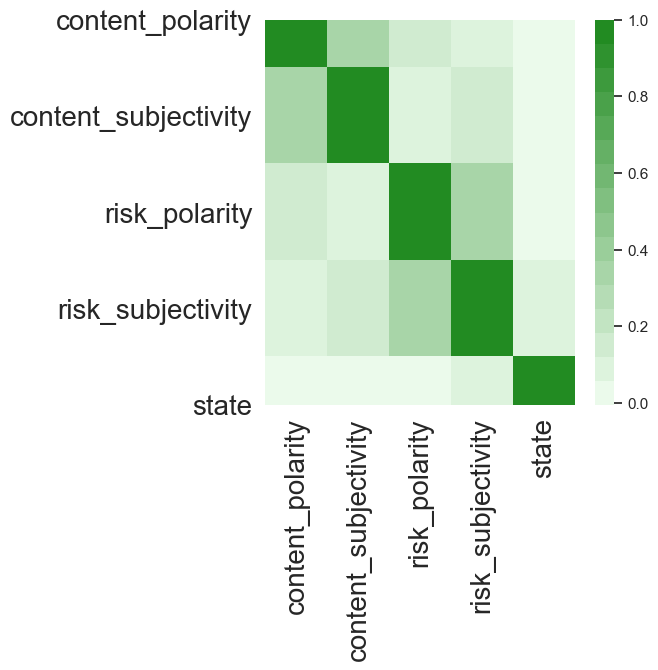

In [572]:
corr = test_info.corr()
plt.figure(figsize=(5,5))
sns.set()
sns.set_style("white")
ax = sns.heatmap(corr,cmap=sns.light_palette("forestgreen",16),annot=False)
ax.tick_params(labelsize=20)

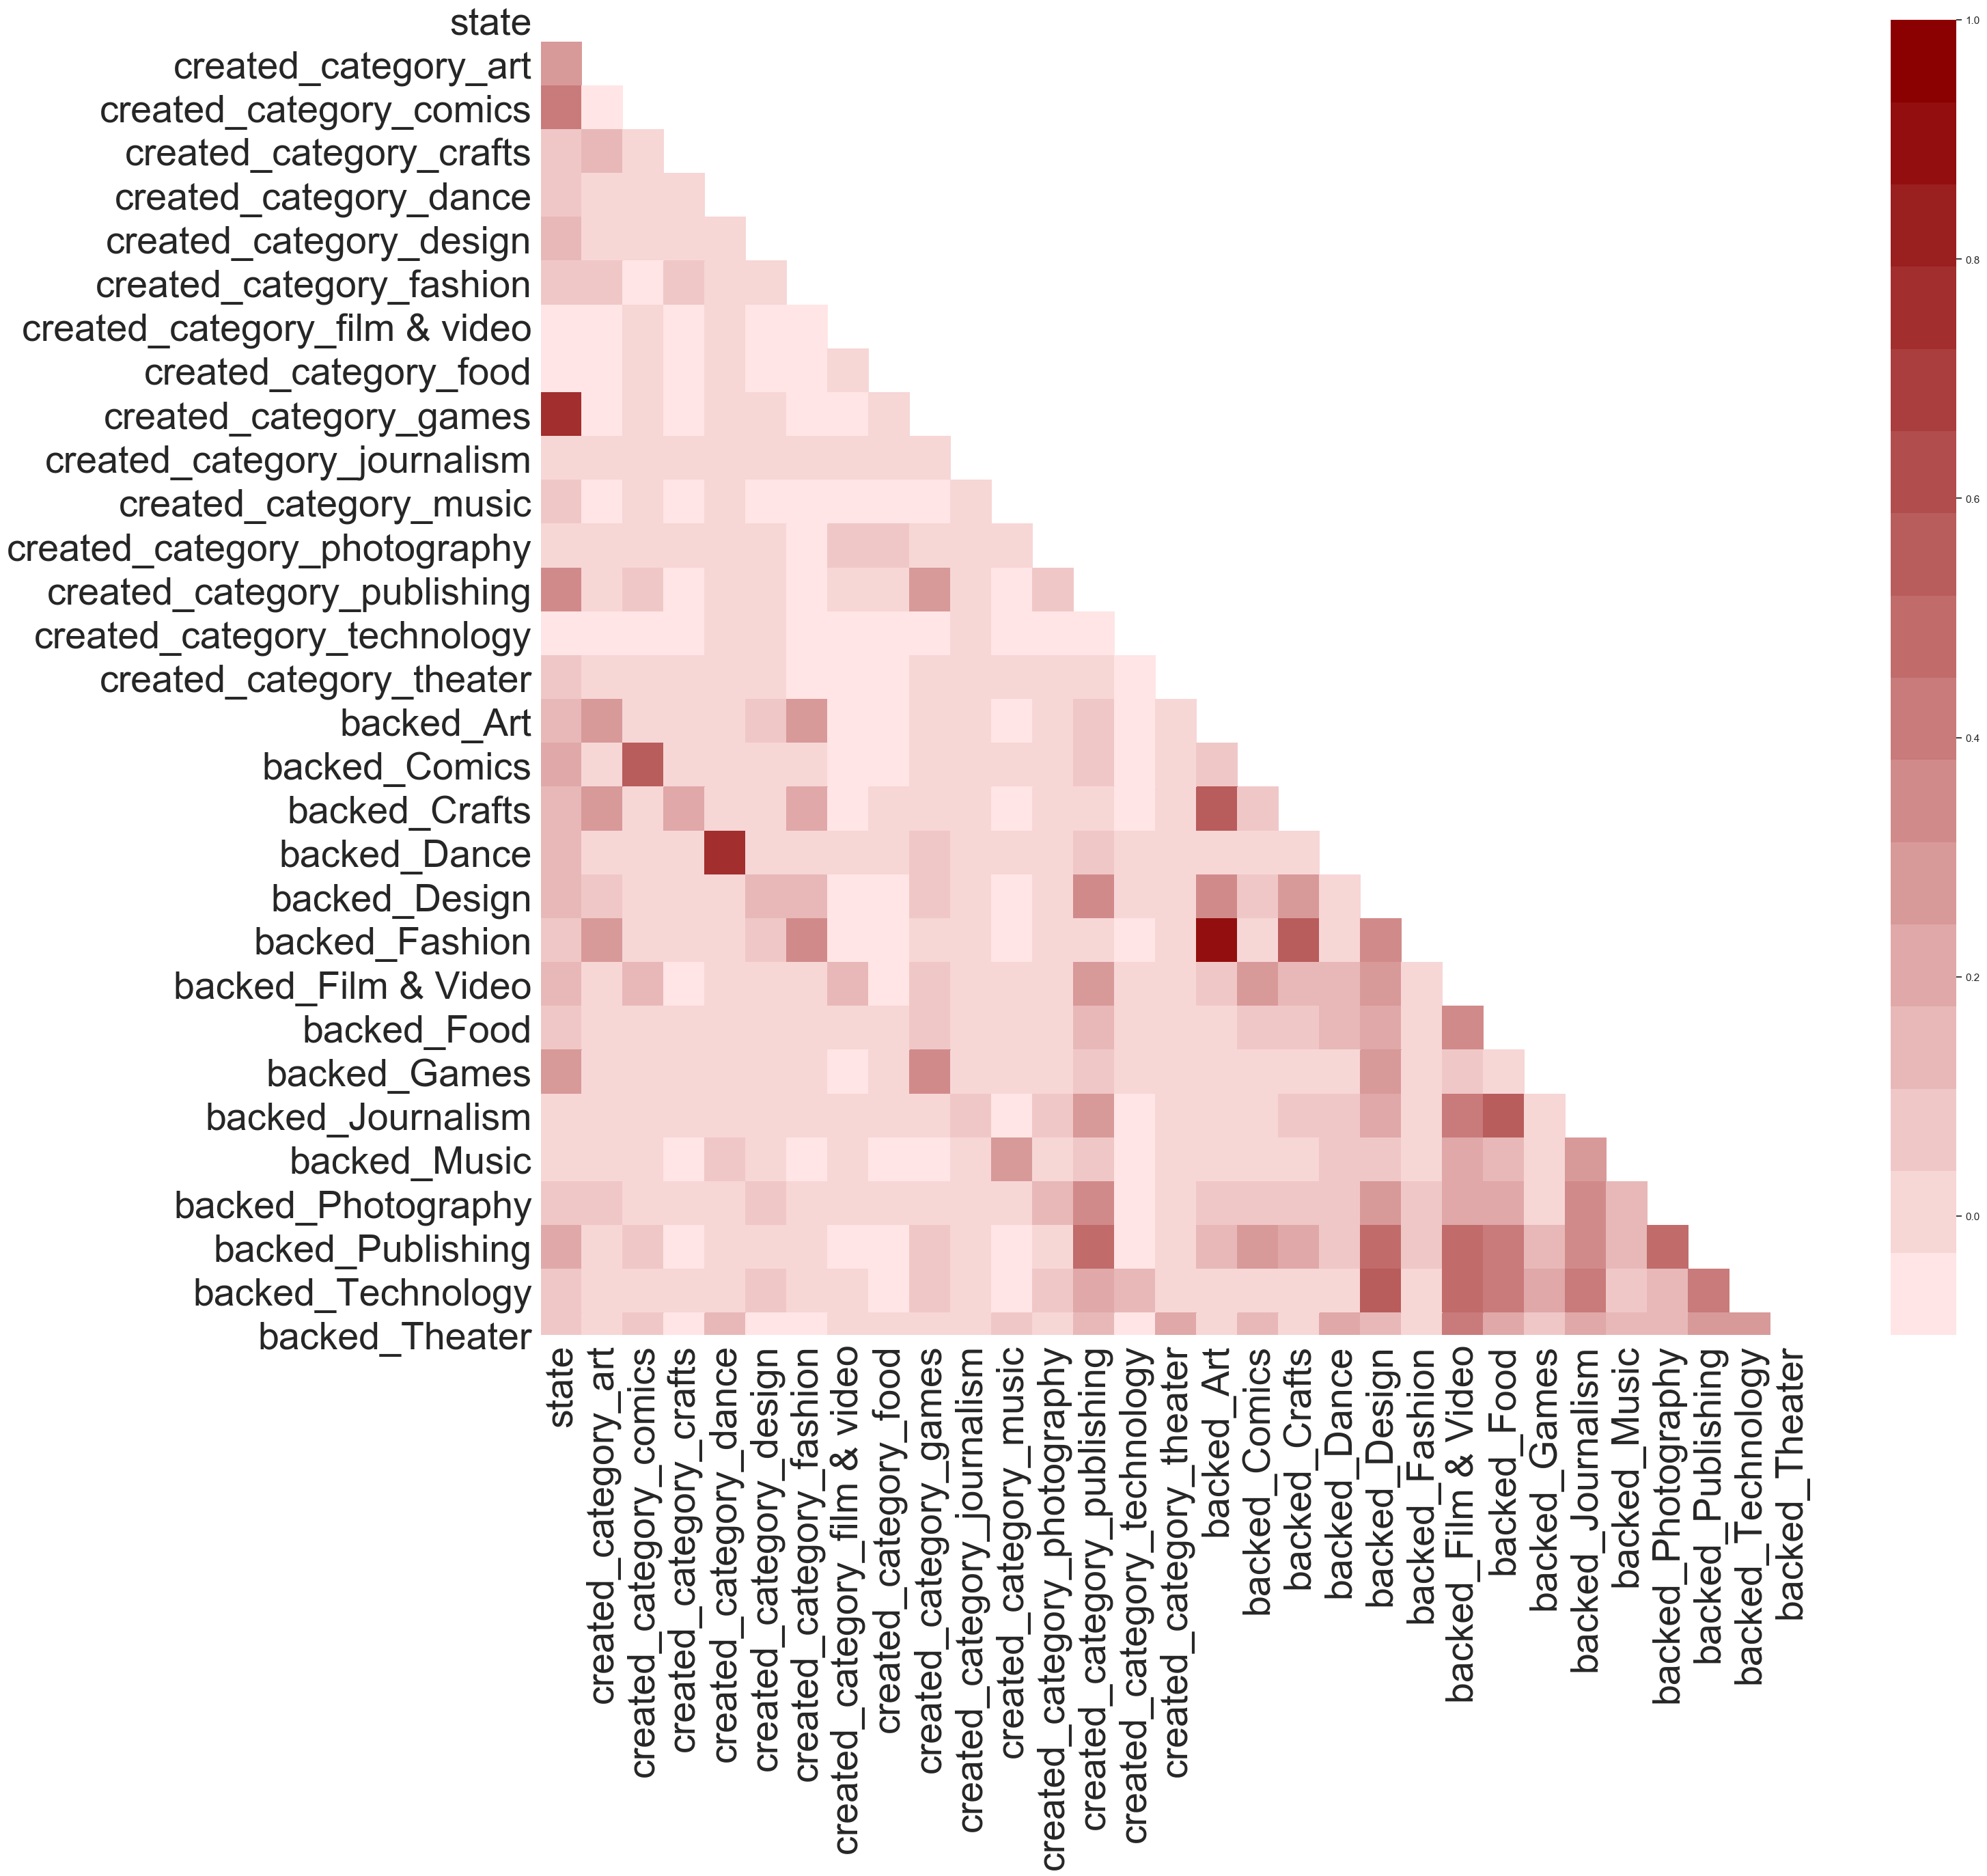

In [435]:
corr = all_extra_author_info.corr()
plt.figure(figsize=(30,25))
sns.set()
sns.set_style("white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr,cmap=sns.light_palette("darkred",16),annot=False,mask=mask)
ax.tick_params(labelsize=40)

In [ ]:
total_topics = dominant_category_reward_df.groupby('main_category',sort=False).count()['dominant_topic'].rename("total_topics")
topic_1 = dominant_category_reward_df.groupby('main_category',sort=False).sum()['dominant_topic'].rename("topic_1")

In [ ]:
category_topic_distribution = pd.concat([topic_1.astype(int), (total_topics).astype(int)], axis=1)
category_topic_distribution['category'] = category_topic_distribution.index
category_topic_distribution

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
f, ax = plt.subplots(figsize=(10, 10))
category_topic_dist = category_topic_distribution.sort_values("total_topics", ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x="total_topics", y="category", data=category_topic_dist,
            label="Total Number of Projects in Category", color="b")
sns.set_color_codes("muted")
sns.barplot(x="topic_1", y="category", data=category_topic_dist,
            label="Number of Intangible Rewards by Category", color="b")
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set_title("Category-wise Reward Topic Distribution\n",weight="bold",fontsize=15)
ax.set(ylabel="",
       xlabel="Total Number of Topics")

In [ ]:
multi_dimension_plot_df = dominant_category_reward_df.copy()
multi_dimension_plot_df['number_of_projects'] = [1 for i in range(0,len(dominant_category_reward_df))]
multi_dimension_plot_df = multi_dimension_plot_df.groupby('main_category',sort=False).sum()[['state','number_of_projects','dominant_topic']]
multi_dimension_plot_df['category']=multi_dimension_plot_df.index
multi_dimension_plot_df['dominant_topic']=multi_dimension_plot_df['dominant_topic'] / multi_dimension_plot_df['number_of_projects']
multi_dimension_plot_df.columns = ['state','number_of_projects','Topic Dominance', 'Category']
multi_dimension_plot_df

In [ ]:
sns.set(style="whitegrid")
sns.set_style("whitegrid", {"axes.edgecolor": "black"})
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x="number_of_projects", y="state", size="Topic Dominance",
                     hue='Category',palette=sns.color_palette("husl",15),
                     sizes=(40, 400),data=multi_dimension_plot_df)
ax.set(ylabel="Number of Successful Projects",
       xlabel="Total Number of Projects")
ax.legend(scatterpoints=1,ncol=6, loc="lower right", frameon=True, labelspacing=1,
          bbox_to_anchor=(1.1,-0.35),borderpad=2,fancybox=True,shadow=True,edgecolor="inherit",
          title="Projects with Intangible Rewards By Category", title_fontsize="15")
ax.set_title("Relationship between Categories, Reward Tangibility and Project Success\n",weight="bold",fontsize=15)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+40, point['y']-3, str(point['val']))

label_point(multi_dimension_plot_df.number_of_projects, 
            multi_dimension_plot_df.state, 
            multi_dimension_plot_df.Category, plt.gca())  

In [ ]:
STOP = get_stopwords_for_lang(all=True)
STOP.extend(['pron','u','x'])
semantic_similarity_df = all_proj_text_data.copy()
semantic_similarity_df['brief'] = semantic_similarity_df['name'] + " " + semantic_similarity_df['blurb']
semantic_similarity_df['main'] = semantic_similarity_df['content_text'] + " " + semantic_similarity_df['risk_text']
semantic_similarity_df.drop(['name','blurb','content_text','risk_text'],axis=1,inplace=True)
semantic_similarity_df['brief'] = semantic_similarity_df['brief'].apply(lambda x: preprocess(x))
semantic_similarity_df['brief'] = semantic_similarity_df['brief'].apply(lambda x: word_lemmatize(x))
semantic_similarity_df['brief'] = semantic_similarity_df['brief'].apply(lambda x: tokenize_regex(x))
semantic_similarity_df['brief'] = semantic_similarity_df['brief'].apply(lambda x: remove_stopwords(x, 
                                                                    stopwords=STOP))
semantic_similarity_df['main'] = semantic_similarity_df['main'].apply(lambda x: preprocess(x))
semantic_similarity_df['main'] = semantic_similarity_df['main'].apply(lambda x: word_lemmatize(x))
semantic_similarity_df['main'] = semantic_similarity_df['main'].apply(lambda x: tokenize_regex(x))
semantic_similarity_df['main'] = semantic_similarity_df['main'].apply(lambda x: remove_stopwords(x, 
                                                                    stopwords=STOP))
semantic_similarity_df

In [ ]:
semantic_similarity_df.to_csv('semantic_similarity_proj_text_data.csv')

In [ ]:
semantic_similarity_df['text_tokens'] = semantic_similarity_df['brief'] + semantic_similarity_df['main']

In [ ]:
text_corpus = list(semantic_similarity_df['text_tokens'])

### Computing IDF for Entire Corpus

In [ ]:
semantic_similarity_df = pd.read_csv('./semantic_similarity_proj_text_data.csv')

In [ ]:
vocabulary = set()
corpus = text_corpus
for wordlist in corpus:
    vocabulary.update(wordlist)
vocabulary = list(vocabulary)
word_index = {w: idx for idx, w in enumerate(vocabulary)}
VOCABULARY_SIZE = len(vocabulary)
DOCUMENTS_COUNT = len(corpus)
print(VOCABULARY_SIZE, DOCUMENTS_COUNT)

In [ ]:
word_idf = np.zeros(VOCABULARY_SIZE)
for wordlist in corpus:
    words = set(wordlist)
    indexes = [word_index[word] for word in words]
    word_idf[indexes] += 1.0
# smooth idf
word_idf = 1 + np.log(DOCUMENTS_COUNT / (1 + word_idf).astype(float))

In [ ]:
idf_dict = { index : word_idf[word_index[index]] for index in word_index }
len(idf_dict)

In [ ]:
T1 = eval(semantic_similarity_df.loc[6345]['brief'])
T2 = eval(semantic_similarity_df.loc[6345]['main'])

In [ ]:
def cosine(T1,T2):
    rvector = list(set(T1).union(set(T2)))
    l1 = [1 if w in T1 else 0 for w in rvector]
    l2 = [1 if w in T2 else 0 for w in rvector]
    cosine = np.dot(l1,l2) / float((sum(l1)*sum(l2))**0.5) 
    print("similarity: ", cosine) 
    return cosine

In [ ]:
import time
import pandas as pd
from nltk.corpus import wordnet
class SemSim:
    def __init__(self, corpus, smooth=False):
        self.corpus = corpus
        self.length = len(corpus)
        self.__smooth_idf = smooth
        self.__load()
    def __load(self):
        vocabulary = set()
        for wordlist in self.corpus:
            vocabulary.update(wordlist)
        vocabulary = list(vocabulary)
        word_index = {w: idx for idx, w in enumerate(vocabulary)}
        self.dictionary = vocabulary
        self.dictionary_size = len(vocabulary)
        self.idf_dict = self.__compute_idf(word_index)
    def __compute_idf(self, word_index):
        word_idf = np.zeros(self.dictionary_size)
        for wordlist in self.corpus:
            words = set(wordlist)
            indexes = [word_index[word] for word in words]
            word_idf[indexes] += 1.0
        if self.__smooth_idf:
            word_idf = 1 + np.log(self.length / (1 + word_idf).astype(float))
        else:
            word_idf = np.log(self.length / (word_idf).astype(float))
        idf_dict = { index : word_idf[word_index[index]] for index in word_index }
        return idf_dict
    def __w_syn_util(self, text):
        if isinstance(text, str):
            text = [text]
        return flatten([wordnet.synsets(w) for w in text])
    def __compute_sim_util(self,z):
        sim = z[0].wup_similarity(z[1])
        return 0.0 if not sim else sim
    def __compute_between_util(self, doc1, doc2, cos_sim):
        total_idf,sim_idf = 0.0,0.0
        doc1 = eval(doc1)
        doc2 = eval(doc2)
        doc2_syn = self.__w_syn_util(doc2)
        for word in doc1:
            word_syn = self.__w_syn_util(word)
            wup_sim_matrix = np.array([[{0: x,1: y} for x in word_syn] for y in doc2_syn])
            try: 
                max_sim = max(cos_sim,
                              np.amax(np.vectorize(self.__compute_sim_util, otypes=[np.float64])(wup_sim_matrix)))
            except ValueError: 
                max_sim = max(cos_sim,0.0)
            total_idf += self.idf_dict[word] 
            sim_idf += max_sim * self.idf_dict[word]
        return (sim_idf / total_idf)
    def between(self, docA, docB):
        start= time.time()
        cos_sim = cosine(docA, docB)
        partition_a = self.__compute_between_util(docA, docB,cos_sim)
        partition_b = self.__compute_between_util(docB, docA,cos_sim)
        sim = (0.5 * (partition_a + partition_b))
        print('Similarity : ',sim)
        print('-'*10,start - time.time(),'seconds','-'*10)
        return sim

In [ ]:
semantic_similarity = SemSim(corpus=text_corpus, smooth=False)
semantic_similarity

In [ ]:
T1 = semantic_similarity_df.loc[6345]['brief']
T2 = semantic_similarity_df.loc[6345]['main']
print(semantic_similarity_df.loc[6345]['main_category'])
sim = round(semantic_similarity.between(T1,T2),1)

In [ ]:
verbose_sim = dict(zip(np.linspace(0,1,6),['strongly_dissimilar', 'mostly_dissimilar', 'somewhat_dissimilar', 'somewhat_similar', 'mostly_similar', 'strongly_similar']))
print(verbose_sim)
verbose_sim[[x for x in verbose_sim.keys() if x <= sim].pop()]

In [ ]:
import time
from itertools import product
from nltk.corpus import wordnet
def semantic_text_similarity(sent1, sent2):
    start_time = time.time()
    first = []
    second = []
    sims = []
    simi = []
    final = []
    if len(sent1) >= len(sent2):
        first = sent1
        second = sent2
    else:
        first = sent2
        second = sent1
    for word1 in first:
        simi =[]
        for word2 in second:
            sims = []
            syns1 = wordnet.synsets(word1)
            syns2 = wordnet.synsets(word2)
            for sense1, sense2 in product(syns1, syns2):
                d = wordnet.wup_similarity(sense1, sense2)
                if d != None:
                    sims.append(d)
            if sims != []:        
                max_sim = max(sims)
                simi.append(max_sim)
        if simi != []:
            max_final = max(simi)
            final.append(max_final)
    similarity_index = np.mean(final)
    print("--- %s seconds ---" % (time.time() - start_time))    
    return similarity_index

In [ ]:
processed_df = pd.read_csv('./text_df_with_similarity.csv')
processed_df

In [ ]:
all_info['semantic_similarity'] = processed_df['semantic_similarity']
all_info

In [ ]:
norm_info.to_csv('norm_proj_info_df.csv',index=False)

In [ ]:
corr_values = pd.read_csv('norm_proj_info_df.csv')
corr_values

In [ ]:
corr_values.to_csv('corr_matrix.csv')

In [ ]:
corr_values.columns